![alt text](images/other/banner.png)
# Trends in Supplemental Education Program
Author: Elijah Lopez

___ 
## Overview

This analysis outlines actionable strategies to improve lead conversion, customer retention, and program effectiveness for a supplemental education program. To optimize lead conversion, this business should re-engage open leads and inactive accounts, highlight long-term value, and prioritize enrollment efforts during high-interest periods like October. Tailored marketing strategies targeting parents of late-elementary school students in key zip codes combined with seasonal promotions during the summer can further enhance lead generation. Referral programs and upselling private sessions to high schoolers present additional opportunities to boost revenue and engagement.

Retention and program effectiveness can be strengthened through active communication with families, clear progress tracking, and incentives for long-term commitments. Monitoring student performance at critical milestones ensures mastery and alignment with family goals, while time-based metrics provide clarity on program expectations and outcomes. By aligning these efforts, this business can foster trust, improve operational efficiency, and deliver meaningful results for both students and families.

___
## Business Problem

This supplemental education program seeks to improve its ability to convert prospective leads into active enrollments, retain students for longer periods, and deliver measurable outcomes that align with family expectations. Addressing these challenges requires identifying patterns in lead behavior, tailoring marketing efforts to key demographics, and ensuring that program offerings effectively meet the diverse needs of students.

___
## Contingencies

### Sources

In [293]:
# Leads
leads_location = 'data/location_2/leads.csv'

# Accounts
accounts_location = 'data/location_2/accounts.csv'

# Assessment Progress
assessment_progress_location = 'data/location_2/assessment_progress.csv'

### Imports

In [294]:
# Standard Data Science Toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns

# Inferential Statistical Tests
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Helper Functions

In [295]:
def standardize_columns(df):
    """
    Makes column names lower case and replaces spaces with underscores.

    Parameters:
        df (pd.dfFrame) - The data containing the groups and values.

    Returns:
        df
    """
    
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    return df

In [296]:
def plot_categorical(df):
    """
    Identifies categorical columns ('object' datatypes) and plots as horizontal bar chart.

    Parameters:
        df (pd.dfFrame) - The data containing the groups and values.

    Returns:
        Plot    
    """

    # Isolate categorical columns
    cat_cols = []
    for column in df.columns:
        if df.dtypes[column] == 'O':
            cat_cols.append(column)

    # Calculate the number of rows and columns needed, limiting to 3 graphs per row
    num_cols_per_row = 3
    num_rows = int(np.ceil(len(cat_cols) / num_cols_per_row))

    # Create subplots with the dynamic grid
    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5))
    axes = axes.flatten()  # Flatten the grid for easy indexing

    # Plot each categorical column
    for i, column in enumerate(cat_cols):
        x = df[column].value_counts().index.astype(str)
        y = df[column].value_counts().values
        
        # Barh plot for the column
        axes[i].barh(x, y, color='skyblue')
        axes[i].set_title(column)
        axes[i].set_xlabel('Count')

    # Adjust layout to prevent overlap
    return plt.tight_layout();

In [297]:
def plot_numeric(df):
    """
    Identifies numeric columns ('float64' & 'int64' datatypes) and plots as horizontal bar chart.

    Parameters:
        df (pd.dfFrame) - The data containing the groups and values.

    Returns:
        Plot    
    """

    # Isolate numeric columns
    num_cols = []
    for column in df.columns:
        if df.dtypes[column] == 'float64' or df.dtypes[column] == 'int64':
            num_cols.append(column)

    # Calculate the number of rows needed, limiting 3 graphs per row
    num_cols_per_row = 3
    num_rows = int(np.ceil(len(num_cols) / num_cols_per_row))

    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(12, 6))
    axes = axes.flatten()

    # Apply to each column
    for i, column in enumerate(num_cols):
        # Plot a histogram for each numeric column
        axes[i].hist(df[column], color='skyblue', edgecolor='black', alpha=0.7)
        
        # Add title and labels
        axes[i].set_title(f'{column}')
        # axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    # Adjust layout to prevent overlap
    return plt.tight_layout();

In [298]:
def plot_x_over_time(x, y, title, y_label, line_label, average_label_color='#E2231A'):
    """
    Plots a time series with a line representing the average value.

    Parameters:
        x (var): Data for x-axis.
        y (var): Data for y-axis.
        title (str): The chart title.
        y_label (str): Label for the y-axis.
        line_label (str): Label for the line in the legend.
        average_label_color (str): Color for the average line (default: '#E2231A').

    Returns:
        Plot
    """

    plt.figure(figsize=(12, 6))

    # Plot the data
    plt.plot(x, y, marker='o', linestyle='-', color='skyblue', label=line_label)

    # Calculate and plot the mean
    average_value = y.mean()
    plt.axhline(y=average_value, color=average_label_color, linestyle='--', label=f'Average ({average_value:.0f})')

    # Add title, labels, and legend
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show();

In [299]:
def plot_x_per_month(y, title, y_label, bar_color='skyblue', avg_line_color='#E2231A'):
    """
    Plots a bar chart of monthly df with a horizontal line showing the average.

    Parameters:
        y (var): Data for y-axis, indexed by three letter abbreviation for month.
        average (float): The value of the horizontal average line.
        title (str): The chart title.
        y_label (str): Label for the y-axis.
        bar_color (str): The color of the bars (default 'skyblue').
        avg_line_color (str): The color of the average line (default '#E2231A').

    Returns:
        Plot
    """
    
    # Sort by the month order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    y = y.reindex(month_order)
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    y.plot(kind='bar', color=bar_color, label='')
    
    # Add a horizontal average line
    average = y.mean()
    plt.axhline(y=average, color=avg_line_color, linestyle='--', label=f'Average ({average:.0f})')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel(y_label)
    plt.xticks(rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show();

In [300]:
def perform_anova(df, group_col, value_col, alpha):
    """
    Performs a one-way ANOVA test to compare means across groups.
    
    Parameters:
        df (pd.dfFrame) - The data containing the groups and values.
        group_col (str) - The column name representing the groups
        value_col (str) - The column name representing the values to compare
        alpha (float) - Confidence level
    
    Returns:
        dict: A dictionary containing the F-Statistic, P-Value, and interpretation
    """
    
    # Group the df by the specified group column
    grouped = df.groupby(group_col)[value_col]
    
    # Extract values for each group into separate lists
    grouped_values = [grouped.get_group(group).values for group in grouped.groups.keys()]
    
    # Perform ANOVA test
    f_stat, p_value = f_oneway(*grouped_values)
    
    # Interpretation
    result = {
        "F-Statistic": f_stat,
        "P-Value": p_value,
        "Significance": "Reject the null in favor of the alternative hypothesis."
        if p_value < 0.05 else "Fail to reject the null hypothesis."
    }
    
    return result

In [301]:
def perform_tukeys_hsd(df, group_col, value_col, alpha=0.05):
    """
    Perform Tukey's HSD test to determine significant differences between groups 
    and return results as a DataFrame with significant differences isolated.

    Parameters:
        df (pd.DataFrame): The data containing the groups and values.
        group_col (str): The column representing groups (e.g., 'month').
        value_col (str): The column representing the dependent variable (e.g., 'lead_count').
        alpha (float): Significance level for the test (default is 0.05).

    Returns:
        tukey_df (pd.DataFrame): A DataFrame containing Tukey HSD results.
        significant_results (pd.DataFrame): Rows with statistically significant differences.
    """
    # Perform Tukey's HSD test
    tukey = pairwise_tukeyhsd(
        endog=df[value_col],  # The dependent variable
        groups=df[group_col],  # The grouping variable
        alpha=alpha  # Significance level
    )
    
    # Print the summary
    print(tukey)

    # Extract Tukey's HSD results into a DataFrame
    tukey_df = pd.DataFrame(
        data=tukey.summary().data[1:],  # Extract data excluding the header row
        columns=tukey.summary().data[0]  # Extract the column names
    )

    # Isolate statistically significant results
    significant_results = tukey_df.loc[tukey_df['reject'] == True]

    return significant_results

In [302]:
def assign_grade_range(grade):
    """
    Assign grade range based on grade

    Parameters:
        grade from df[col]

    Returns:
        grade range ('Elementary', 'Middle', or 'High')
    """

    if grade >= 9:
        return 'High'
    elif 5 < grade < 9:
        return 'Middle'
    else:
        return 'Elementary'

In [303]:
def plot_histogram(data, title, x_label, mean_median='median', x_ticks_interval=1, bins=None):
    """
    Plots a histogram of a df column with a vertical line showing the median (default) or average.

    Parameters:
        data (var): Column from data frame to be plotted.
        title (str): The chart title.
        x_label (str): Label for the x-axis.
        mean_median (str): Specify whether to plot the vertical line as the mean or median value.

    Returns:
        Plot
    """    
    
    # Data to plot
    data = data
    # median = data.median()
    x_ticks = range(int(data.min()), int(data.max()) + 1, x_ticks_interval)
    
    if mean_median == 'median':
        vline = data.median()
    elif mean_median == 'mean':
        vline = data.mean()
    else:
        vline = None
    
    if bins is None:
        bins = int(data.max() - data.min())
    
    # Plot
    plt.hist(data, bins=bins, color='skyblue')
    plt.axvline(x=vline, color='#E2231A', linestyle='--', label=f'{mean_median.title()} ({vline:.1f})')

    # Add title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.xticks(x_ticks)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show();

___
## Leads

### Data

Lead data comes from two distinct sources. To ensure integrity and usability, I merged the datasets into a unified DataFrame, removing duplicate columns and preserving unique information. Additionally, I anonymized the data to maintain confidentiality and protect proprietary details.

In [304]:
# Inspect Contents
leads= pd.read_csv(leads_location)
leads = standardize_columns(leads)
leads.head()

,created_date,zip_code,lead_status,conversion_status,student_gender,grade,lead_source
0,9/26/2024,0,Open,Unconverted,NaN,12,Not Specified
1,11/26/2024,0,Open,Unconverted,NaN,NaN,Not Specified
2,10/17/2022,0,Do Not Contact,Unconverted,Female,8,Internet
3,10/24/2022,0,Mail Only,Unconverted,NaN,1,Not Specified
4,11/16/2022,0,Mail Only,Unconverted,NaN,1,Not Specified


In [305]:
# See shape of df
leads.shape

(1358, 7)

In [306]:
# Replace 0 for NaN in zipcodes
leads['zip_code'].replace(0, np.NaN, inplace=True)

In [307]:
# View Data Types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   created_date       1358 non-null   object 
 1   zip_code           391 non-null    float64
 2   lead_status        1338 non-null   object 
 3   conversion_status  1358 non-null   object 
 4   student_gender     209 non-null    object 
 5   grade              889 non-null    object 
 6   lead_source        1358 non-null   object 
dtypes: float64(1), object(6)
memory usage: 74.4+ KB


In [308]:
# Count nulls -- Note: some still exist as non 'null' values
leads.isna().sum()

created_date            0
zip_code              967
lead_status            20
conversion_status       0
student_gender       1149
grade                 469
lead_source             0
dtype: int64

In [309]:
# Not very helpful for zipcodes
leads.describe()

,zip_code
count,391.000000
mean,4.603581
std,5.135486
min,1.000000
25%,2.000000
50%,2.000000
75%,5.000000
max,29.000000


In [310]:
# Transform created_date to datetime and make index
leads['created_date'] = pd.to_datetime(leads['created_date'])
leads.sort_values(by='created_date', ascending=True, inplace=True)
leads.set_index('created_date', inplace=True)

In [311]:
# Calculate date range of data
leads_min_date = leads.index.min().strftime('%Y-%m-%d')
leads_max_date = leads.index.max().strftime('%Y-%m-%d')
print(f'The data includes leads from {leads_min_date} to {leads_max_date}.')

The data includes leads from 2011-07-16 to 2024-12-07.


#### Data Visualization

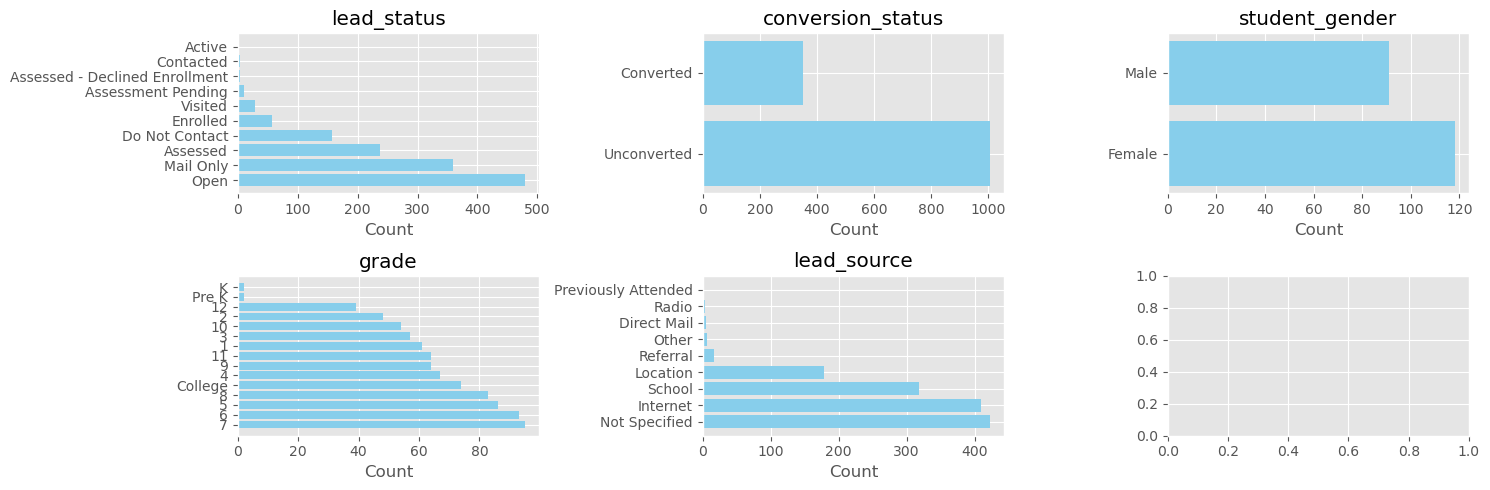

In [312]:
plot_categorical(leads)

Here we see:
* Most leads are 'open' which gives rise to the opportunity of advancement in the pipeline.
* Most leads have not been converted, not uncommon in sales.
* Slightly higher interest for parents of female students.
* Most students are in middle school.
* Most leads have no specified lead source. Most identified leads come from the internet with location being the second most dominant type.

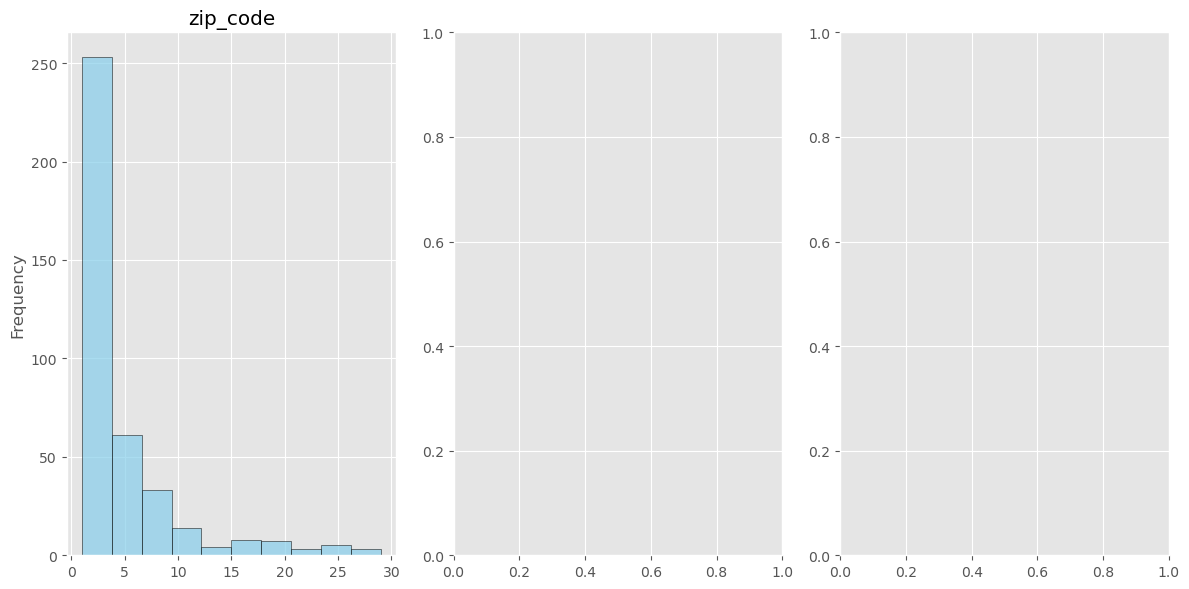

In [313]:
plot_numeric(leads)

This graph does not tell us much because the zip codes are encoded

#### Data Summary

There are 1,358 leads from July 2011 - Dec. 2024 measured on 7 features. These include:
* created_date - When the lead first entered the system.
* zip_code - Geographic location; masked for anonyminity. 0 Represents null values.
* lead_status - Where they are at in the pipeline; 20 untracked leads.
* conversion_status - Whether or not they enrolled in service; no nulls.
* student_gender - Most nulls (1,149), indicating this data is not collected consistently upon initial lead contact.
* grade - 469 null values; 'college', 'k', and 'pre k' are forcing string type. Convert to integers.
* lead_source - Nulls represented as 'Not Specified'

### Analysis

#### Lead Volume Over Time

In [314]:
# Group leads by month
monthly_leads = leads.resample('M').agg(
    converted_leads=('conversion_status', lambda x: (x == 'Converted').sum()),      # Use conversion_status because it has no nulls
    lead_count=('conversion_status', 'count')     
)
monthly_leads

,converted_leads,lead_count
created_date,,
2011-07-31,1,1
2011-08-31,0,0
2011-09-30,0,0
2011-10-31,0,0
2011-11-30,0,0
...,...,...
2024-08-31,7,15
2024-09-30,6,26
2024-10-31,9,27


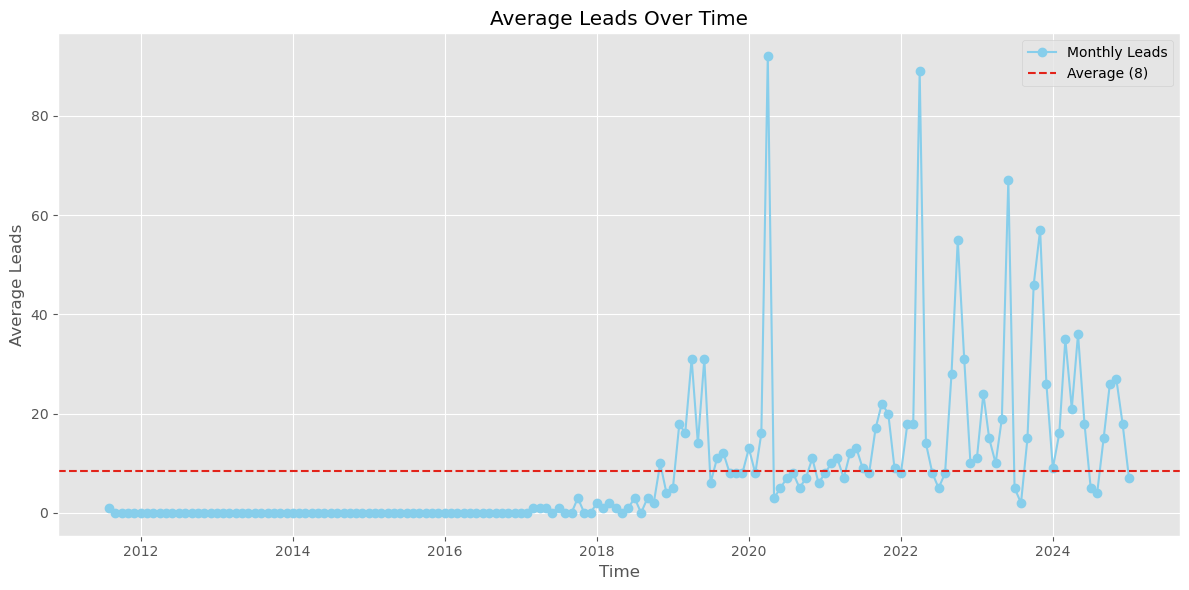

In [315]:
plot_x_over_time(
    x=monthly_leads.index,
    y=monthly_leads['lead_count'],
    title='Average Leads Over Time',
    y_label='Average Leads',
    line_label='Monthly Leads'
)

Here we see that leads prior to 2019 were extremely low on a monthly basis. Let's focus on more recent years where the data is more consistent.

In [316]:
# Filter data starting in 2019.
# Data should include last full month. End data Nov 2024.
filtered_monthly_leads = monthly_leads[(monthly_leads.index >= '2019-01-01') & (monthly_leads.index < '2024-12-01')]

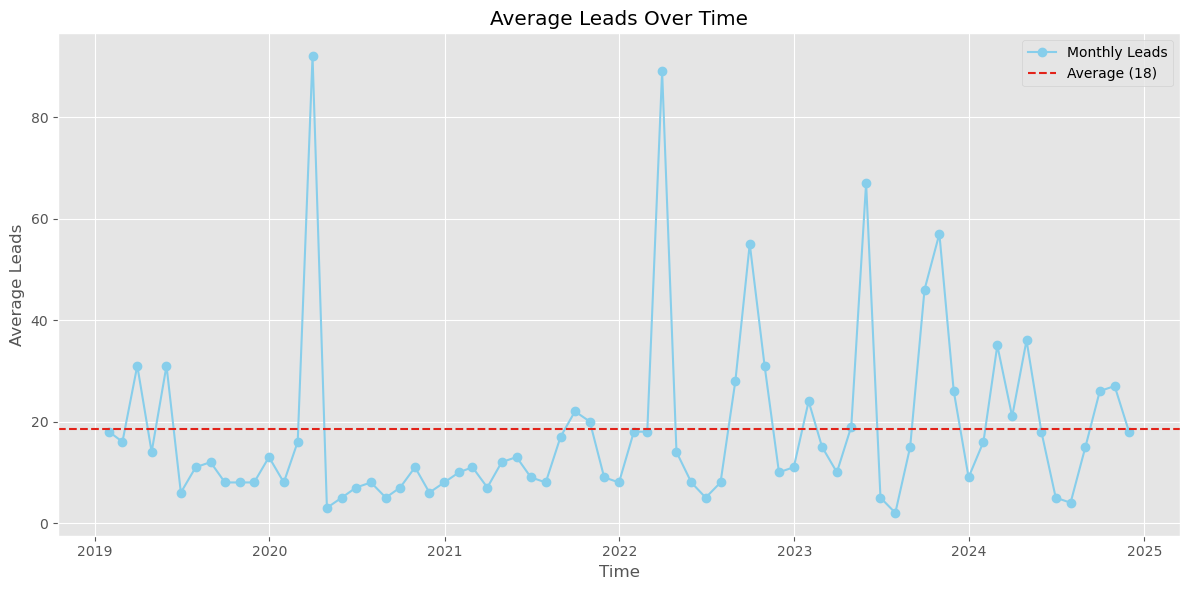

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_x_over_time(
    x=filtered_monthly_leads.index,
    y=filtered_monthly_leads['lead_count'],
    title='Average Leads Over Time',
    y_label='Average Leads',
    line_label='Monthly Leads'
)

Here we see average leads per month is 18.

#### Lead Volume per Month

In [470]:
# Create 'month' column and set equal to 3 letter abbreviation
filtered_monthly_leads['month'] = filtered_monthly_leads.index.month_name().str[:3]

# Group by month and calculate the mean for each
monthly_mean = filtered_monthly_leads.groupby('month').mean()

monthly_mean

C:\Users\Elija\AppData\Local\Temp\ipykernel_12668\3746171043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_leads['month'] = filtered_monthly_leads.index.month_name().str[:3]


,converted_leads,lead_count
month,,
Apr,4.166667,16.333333
Aug,5.833333,15.333333
Dec,2.800000,9.800000
Feb,5.666667,18.500000
Jan,4.666667,15.666667
Jul,2.000000,6.833333
Jun,2.666667,6.166667
Mar,5.333333,41.666667
May,6.500000,23.666667


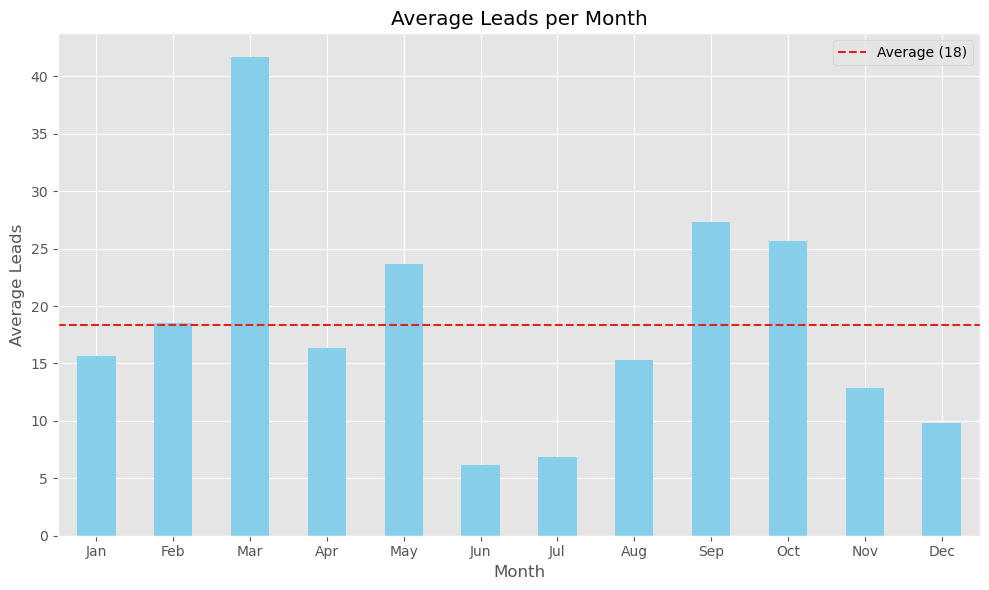

In [471]:
plot_x_per_month(
    y=monthly_mean['lead_count'],
    title='Average Leads per Month',
    y_label='Average Leads'
)

Here we see that lead volume is:
* Lowest in June & July -- Corresponding with summer
* Highest in March -- Corresponding with the start of the 4th quarter.

##### Statistical Testing

Because I am comparing multiple groups I will conduct an ANOVA test.
* H0: There is not a significant difference in lead volume for different months of the year.
* H1: There is a significant difference in lead volume for different months of the year.
* Alpha = 0.05

In [472]:
# Run ANOVA Test
perform_anova(filtered_monthly_leads, 'month', 'lead_count', 0.05)

{'F-Statistic': 2.284786646431473,
 'P-Value': 0.021048862536747204,
 'Significance': 'Reject the null in favor of the alternative hypothesis.'}

Because the above result was significant I will follow up with Tukey's HSD to find which months have a significant difference.
* H0: The mean lead volume of month A and month B are not significantly different.
* H1: The mean lead volume of month A and month B are significantly different.
* Alpha = 0.05

In [473]:
# Follow up with Tukey's HSD
lead_count_tukey = perform_tukeys_hsd(filtered_monthly_leads, 'month', 'lead_count', 0.05)
lead_count_tukey

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   Apr    Aug     -1.0    1.0 -32.8167 30.8167  False
   Apr    Dec  -6.5333 0.9999  -39.903 26.8363  False
   Apr    Feb   2.1667    1.0   -29.65 33.9834  False
   Apr    Jan  -0.6667    1.0 -32.4834   31.15  False
   Apr    Jul     -9.5 0.9967 -41.3167 22.3167  False
   Apr    Jun -10.1667 0.9942 -41.9834   21.65  False
   Apr    Mar  25.3333 0.2477  -6.4834   57.15  False
   Apr    May   7.3333 0.9997 -24.4834   39.15  False
   Apr    Nov     -3.5    1.0 -35.3167 28.3167  False
   Apr    Oct   9.3333 0.9972 -22.4834   41.15  False
   Apr    Sep     11.0 0.9889 -20.8167 42.8167  False
   Aug    Dec  -5.5333    1.0  -38.903 27.8363  False
   Aug    Feb   3.1667    1.0   -28.65 34.9834  False
   Aug    Jan   0.3333    1.0 -31.4834   32.15  False
   Aug    Jul     -8.5 0.9988 -40.3167 23.3167  False
   Aug    Jun  -9.1667 0.997

,group1,group2,meandiff,p-adj,lower,upper,reject
46,Jul,Mar,34.8333,0.0204,3.0166,66.6500,True
51,Jun,Mar,35.5000,0.0166,3.6833,67.3167,True


* March has significantly more leads than June and July. 
* All other months do not show a significant difference

#### Number of Leads Converted Over Time

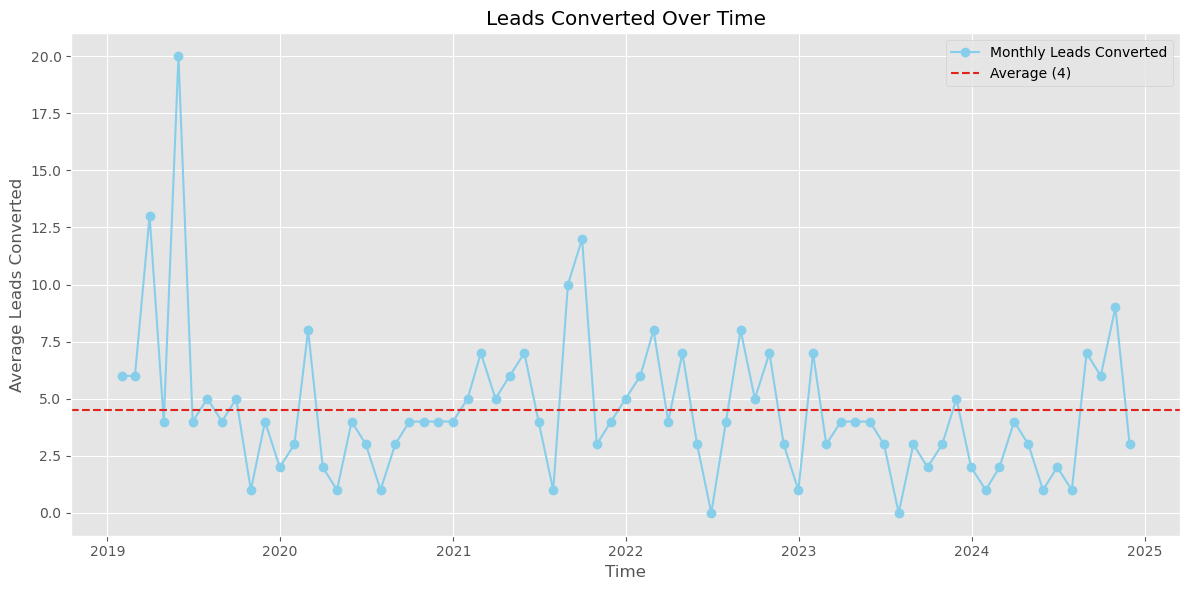

In [474]:
plot_x_over_time(
    x=filtered_monthly_leads.index,
    y=filtered_monthly_leads['converted_leads'],
    title='Leads Converted Over Time',
    y_label='Average Leads Converted',
    line_label='Monthly Leads Converted'
)

Here we see average number of leads converted per month is 4.

#### Number of Leads Converted per Month

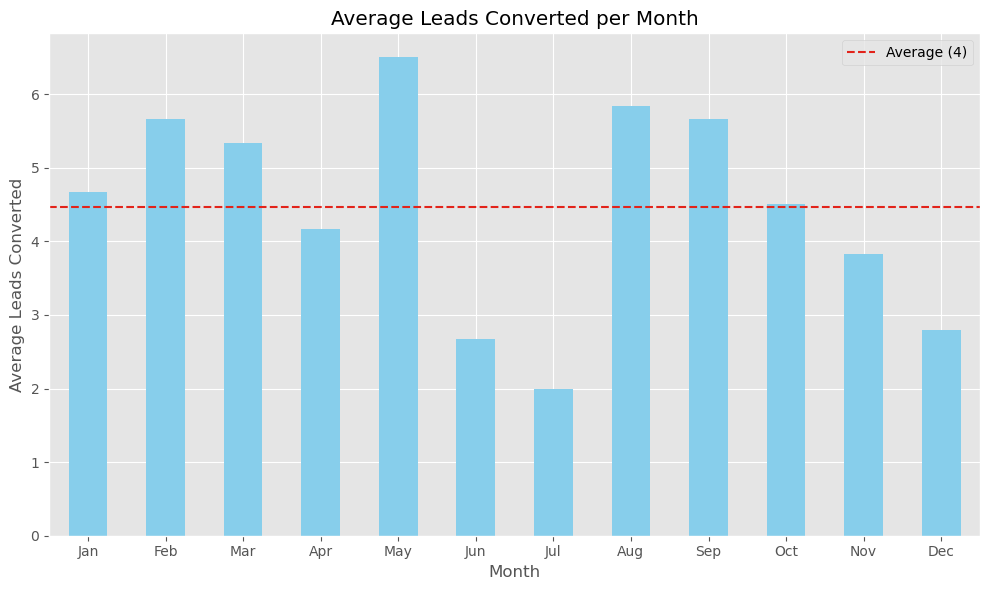

In [475]:
plot_x_per_month(
    y=monthly_mean['converted_leads'],
    title='Average Leads Converted per Month',
    y_label='Average Leads Converted'
)

Here we see:
* Number of leads converted is lowest in July (summer)
* Number of leads converted is highest in May (finals)

##### Statistical Testing

Because I am comparing multiple groups I will conduct an ANOVA test.
* H0: There is not a significant difference in number of converted leads for different months of the year.
* H1: There is a significant difference in number of converted leads for different months of the year.
* Alpha = 0.05

In [476]:
# Run ANOVA Test
perform_anova(filtered_monthly_leads, 'month', 'converted_leads', 0.05)

{'F-Statistic': 1.2032512259946964,
 'P-Value': 0.3051623804233659,
 'Significance': 'Fail to reject the null hypothesis.'}

The ANOVA test showed no statistically significant difference in means between any two months for converted leads.

#### Percent Lead Conversion Over Time

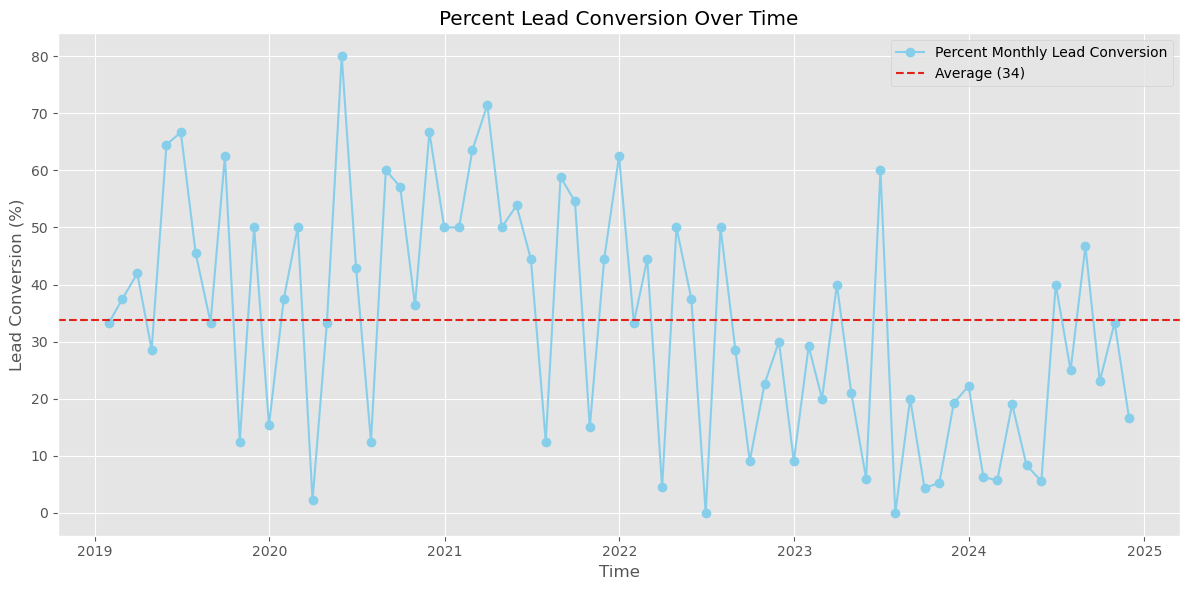

In [477]:
plot_x_over_time(
    x=filtered_monthly_leads.index,
    y=filtered_monthly_leads['converted_leads'] / filtered_monthly_leads['lead_count'] * 100,
    title='Percent Lead Conversion Over Time',
    y_label='Lead Conversion (%)',
    line_label='Percent Monthly Lead Conversion'
)

Here we see average lead conversion is 34%.

#### Percent Lead Conversion per Month

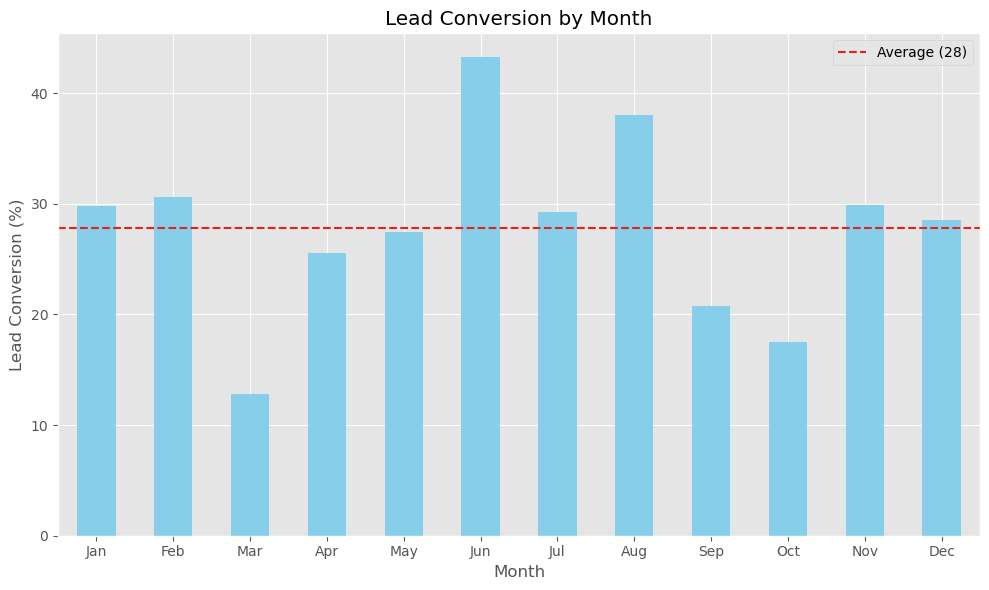

In [478]:
plot_x_per_month(
    y=monthly_mean['converted_leads'] / monthly_mean['lead_count'] * 100,
    title='Lead Conversion by Month',
    y_label='Lead Conversion (%)'
)

Here we see that percent lead conversion is:
* Lowest in March
* Highest in June

`Note`: This is an average of an average. That is why it differs from the overall average over time.

#### Grade

Grade is updated every year to keep track of students over time. We'll have to calculate the grade at time of lead creation to make this useful. Because 'college' (13) is a fixed value, students with that label will be excluded from this calculation.

`Note`: This will inherently introduce bias by omitting students in grades nearest to that label.

In [479]:
# Create map to replace 'College' and 'K'
grade_map = {
    'College': 13,
    'K': 0,
    'Pre K': -1
}

In [480]:
# Apply map to 'grade' column
leads['grade'] = leads['grade'].replace(grade_map)

In [481]:
# Copy Leads df and isolate those where Grade is not 13 or NaN
lead_student_grades = leads.copy()
lead_student_grades = lead_student_grades.loc[(lead_student_grades['grade'] != 13) & (lead_student_grades['grade'].notna())]

In [482]:
# Calculate elapsed time
lead_student_grades['elapsed_years'] = (pd.to_datetime('now') - lead_student_grades.index)

# Convert to years
lead_student_grades['elapsed_years'] = round(lead_student_grades['elapsed_years'].dt.total_seconds() / (60 * 60 * 24 * 365.25), 0)
lead_student_grades.head()

,zip_code,lead_status,conversion_status,student_gender,grade,lead_source,elapsed_years
created_date,,,,,,,
2018-10-08,NaN,Do Not Contact,Unconverted,NaN,9,Internet,6.0
2018-11-01,NaN,Mail Only,Unconverted,NaN,11,Internet,6.0
2018-11-28,NaN,Do Not Contact,Unconverted,NaN,7,Location,6.0
2019-01-02,NaN,Do Not Contact,Unconverted,NaN,10,Direct Mail,6.0
2019-01-28,NaN,Mail Only,Unconverted,NaN,9,Location,6.0


In [483]:
lead_student_grades['grade'] = lead_student_grades['grade'].astype(int)
lead_student_grades['grade_when_created'] = lead_student_grades['grade'] - lead_student_grades['elapsed_years']
lead_student_grades.head()

,zip_code,lead_status,conversion_status,student_gender,grade,lead_source,elapsed_years,grade_when_created
created_date,,,,,,,,
2018-10-08,NaN,Do Not Contact,Unconverted,NaN,9,Internet,6.0,3.0
2018-11-01,NaN,Mail Only,Unconverted,NaN,11,Internet,6.0,5.0
2018-11-28,NaN,Do Not Contact,Unconverted,NaN,7,Location,6.0,1.0
2019-01-02,NaN,Do Not Contact,Unconverted,NaN,10,Direct Mail,6.0,4.0
2019-01-28,NaN,Mail Only,Unconverted,NaN,9,Location,6.0,3.0


In [484]:
lead_student_grades['grade_when_created'].value_counts()

grade_when_created
 5.0     121
 3.0     111
 4.0      98
 6.0      88
 0.0      82
 2.0      73
 1.0      69
 7.0      65
 8.0      34
 9.0      29
 10.0     16
-1.0      15
 11.0      9
 12.0      5
Name: count, dtype: int64

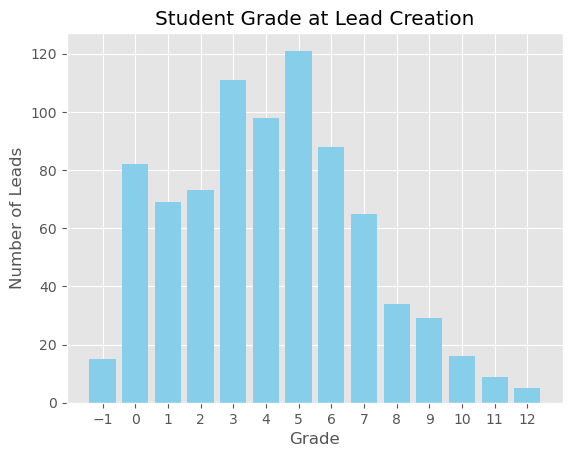

In [485]:
# Data to plot
x = lead_student_grades['grade_when_created'].value_counts().index
y = lead_student_grades['grade_when_created'].value_counts().values

# Plot
plt.bar(x, y, color='skyblue')

# Add title and labels
plt.title('Student Grade at Lead Creation')
plt.xlabel('Grade')
plt.xticks(range(int(x.min()), int(x.max()) + 1))
plt.ylabel('Number of Leads')
plt.show();

Here we see that some inquiries happen prior to Kindergarten, while most occur in 5th grade.

#### Lead Source

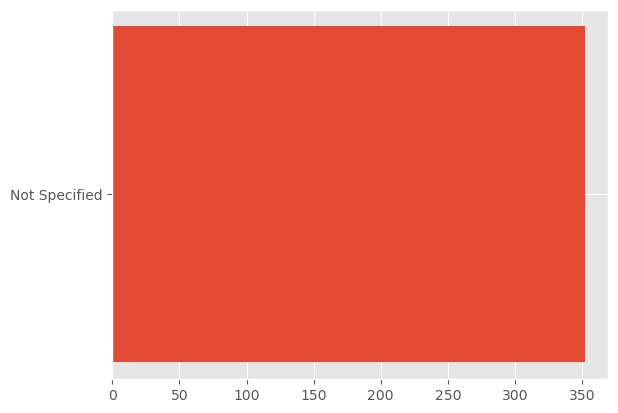

In [486]:
# Isolate Converted Leads
converted_leads = leads.loc[leads['conversion_status'] == 'Converted']

x = converted_leads['lead_source'].value_counts().index
y = converted_leads['lead_source'].value_counts().values

plt.barh(x, y);

Here we see:
* All converted leads show lead source as null.

`Note`: After investigating the data source I found that Lead Source is tracked upon conversion but is limited to a small window of accessibility. For that reason I did not import the data to analyze further.

#### Leads by Zip Code

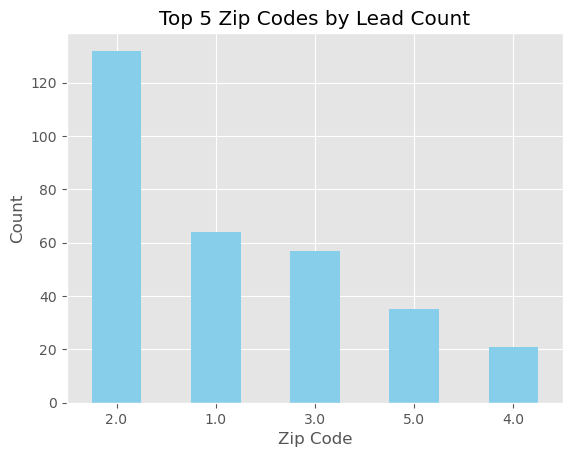

In [487]:
# Top 5 Zip Codes by Lead Volume
top_zip_codes_count = leads['zip_code'].value_counts().nlargest(5)

# Plot
top_zip_codes_count.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Top 5 Zip Codes by Lead Count')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

Here we see that most leads come from the following zip codes:
* 2
* 1
* 3
* 5
* 4

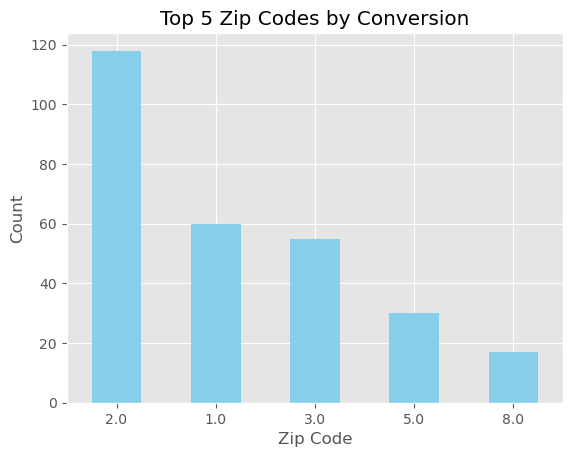

In [488]:
# Top 5 Zip Codes by Conversion
top_zip_codes_converted = converted_leads['zip_code'].value_counts().nlargest(5)

# Plot
top_zip_codes_converted.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Top 5 Zip Codes by Conversion')
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

Here we see that most enrollments come from the following zip codes:
* 2
* 1
* 3
* 5
* 8

`Note`: The count for converted leads is almost identical to the count for all Leads. This indicates that this information is likely captured upon enrollment, not during initial lead contact.

### Recommendations

* Re-engage with ‘open’ leads to push them further in the pipeline.
* Demonstrate long term value to unconverted leads. Incentivize them to come in.
* With lead interest highest  at the end of the third quarter, focus on enrollment conversion.
    * Despite highest leads in March that is month of lowest percent conversion.
* With lead interest lowest over the summer, focus on retention strategies.
    * Although June is one of the months with the lowest lead volume, conversion percentage is highest.
* Ensure marketing strategy is tailored to target demographic:
    * Parents of late-elementary school students (grades 3-5).
    * Residents in zip codes 2, 1, and 3.

___
## Accounts

### Data

Account data comes from two distinct sources. To ensure integrity and usability, I merged the datasets into a unified DataFrame, removing duplicate columns and preserving unique information. Additionally, I anonymized the data to maintain confidentiality and protect proprietary details.

In [489]:
# Inspect contents
accounts = pd.read_csv(accounts_location)
accounts = standardize_columns(accounts)
accounts.head()

,grade,status,membership_type,primary_enrollment_start,primary_enrollment_end,enrollment_contract_length,enrollment_length_of_stay,total_sessions,referral_account
0,9,Inactive,Monthly Sessions,8/2/2021,3/3/2022,7 months,7 months,8,0
1,8,Enrolled,Flexible,11/3/2022,10/31/2023,11.9 months,11.9 months,0,0
2,8,Enrolled,Flexible,12/3/2023,1/31/2024,1.9 months,1.9 months,0,0
3,8,Enrolled,Flexible,2/1/2024,2/29/2024,0.9 month,0.9 month,0,0
4,8,Enrolled,Flexible,8/1/2024,7/31/2025,12 months,4.3 months,0,0


In [490]:
# See shape of df
accounts.shape

(551, 9)

In [491]:
# View Data Types
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   grade                       551 non-null    object
 1   status                      551 non-null    object
 2   membership_type             551 non-null    object
 3   primary_enrollment_start    551 non-null    object
 4   primary_enrollment_end      551 non-null    object
 5   enrollment_contract_length  551 non-null    object
 6   enrollment_length_of_stay   551 non-null    object
 7   total_sessions              551 non-null    int64 
 8   referral_account            551 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 38.9+ KB


In [492]:
# Check for nulls -- Thankfully, NONE!
accounts.isna().sum()

grade                         0
status                        0
membership_type               0
primary_enrollment_start      0
primary_enrollment_end        0
enrollment_contract_length    0
enrollment_length_of_stay     0
total_sessions                0
referral_account              0
dtype: int64

In [493]:
# Get stats for numeric columns
accounts.describe()

,total_sessions,referral_account
count,551.000000,551.000000
mean,4.067151,0.027223
std,9.591901,0.162881
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,8.000000,0.000000
max,99.000000,1.000000


In [494]:
# See membership types
accounts['membership_type'].value_counts()

membership_type
Flexible                                               319
Monthly Sessions                                       119
Private Sessions Package                                43
Credits (Monthly Sessions)                              15
Summer 2024 (Private Sessions Package)                  14
Summer Program (Private Sessions Package)                8
Monthly Sessions (4x) (Monthly Sessions)                 7
Summer 2023 (Private Sessions Package)                   5
Military and First Responders 6X (Monthly Sessions)      4
Sessions Package                                         3
Summer Promotion (Sessions Package)                      3
Paid in full (Monthly Sessions)                          3
Credits (Flexible)                                       2
Paid In Full  (Monthly Sessions)                         1
Veronica Alvarez WP21 (Private Sessions Package)         1
Winter Sessions Package (Private Sessions Package)       1
Enrollment Fee Only (Monthly Sessions)  

In [495]:
# 'total_sessions' is not a cumulative count
accounts['total_sessions'].value_counts()

total_sessions
0     321
8     107
1      37
12     31
4      15
10     11
17     10
20      6
6       4
99      4
13      2
16      1
14      1
40      1
Name: count, dtype: int64

#### Data Cleaning & Feature Engineering

* grade - Current grade; 'college', 'k', and 'pre k' are forcing string type. Convert to integers.
* membership_type - Remove 'credits' and consolidate remaining
* primary_enrollment_start - Convert to datetime
* primary_enrollment_end - Convert to datetime
* enrollment_contract_length - Remove unit from entry. Convert to integers.
* enrollment_length_of_stay - Remove unit from entry. Convert to integers.

In [496]:
# Replace 'college' with 13 and 'k' with 0
accounts['grade'] = accounts['grade'].replace(grade_map)

In [497]:
# Remove 'credit' type enrollments from data frame
accounts = accounts[accounts['membership_type'] != 'Credits (Monthly Sessions)']

In [498]:
# Convert enrollment dates to date time
accounts['primary_enrollment_start'] = pd.to_datetime(accounts['primary_enrollment_start'])
accounts['primary_enrollment_end'] = pd.to_datetime(accounts['primary_enrollment_end'])

# Set index to enrollment start date and sort by date
accounts.set_index('primary_enrollment_start', inplace=True)
accounts.sort_index(ascending=True, inplace=True)

In [499]:
# Strip enrollment_contract_length & enrollment_length_of_stay of the word 'months'
accounts['enrollment_contract_length'] = accounts['enrollment_contract_length'].str.split(' ').str[0]
accounts['enrollment_length_of_stay'] = accounts['enrollment_length_of_stay'].str.split(' ').str[0]

# Convert to float
accounts['enrollment_length_of_stay'] = pd.to_numeric(accounts['enrollment_length_of_stay'], errors='coerce')
accounts['enrollment_contract_length'] = pd.to_numeric(accounts['enrollment_contract_length'], errors='coerce')

In [500]:
# Calculate date range of data
accounts_min_date = accounts.index.min().strftime('%Y-%m-%d')
accounts_max_date = accounts.index.max().strftime('%Y-%m-%d')
print(f'The data includes accounts from {accounts_min_date} to {accounts_max_date}.')

The data includes accounts from 2011-07-17 to 2024-12-09.


#### Data Visualization

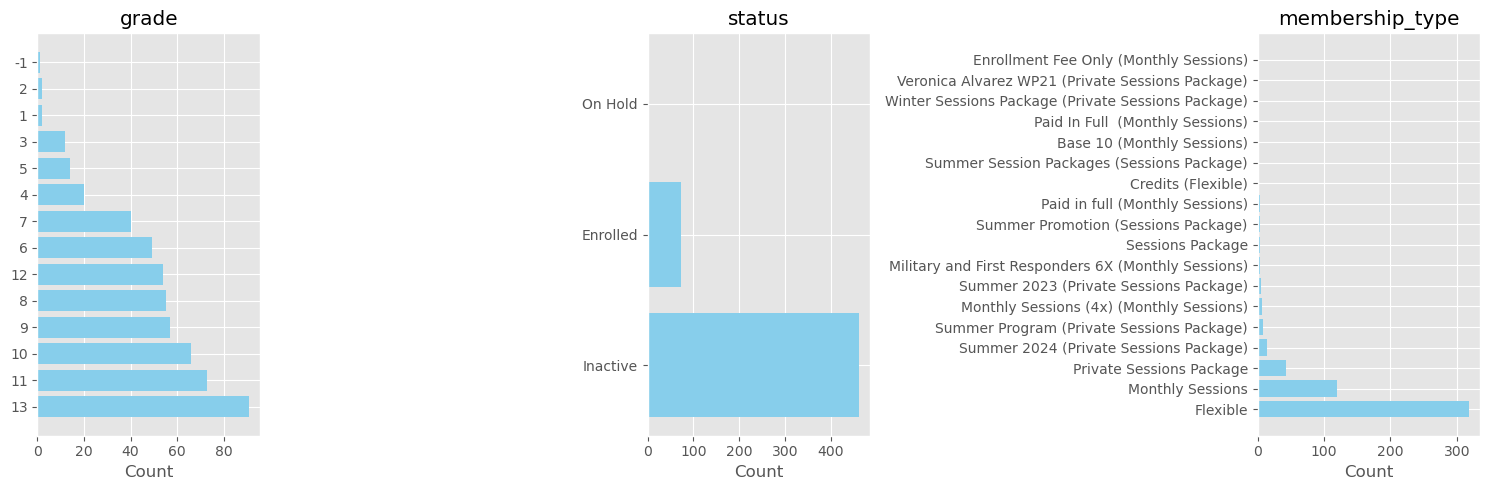

In [501]:
# Plot categorical columns
plot_categorical(accounts)

Here we see:
* Most students are now college level.
* Enrollment status is highly skewed toward Inactive.
* There are many membership types. Most are near 0 counts with the majority being of the 'Flexible' type.

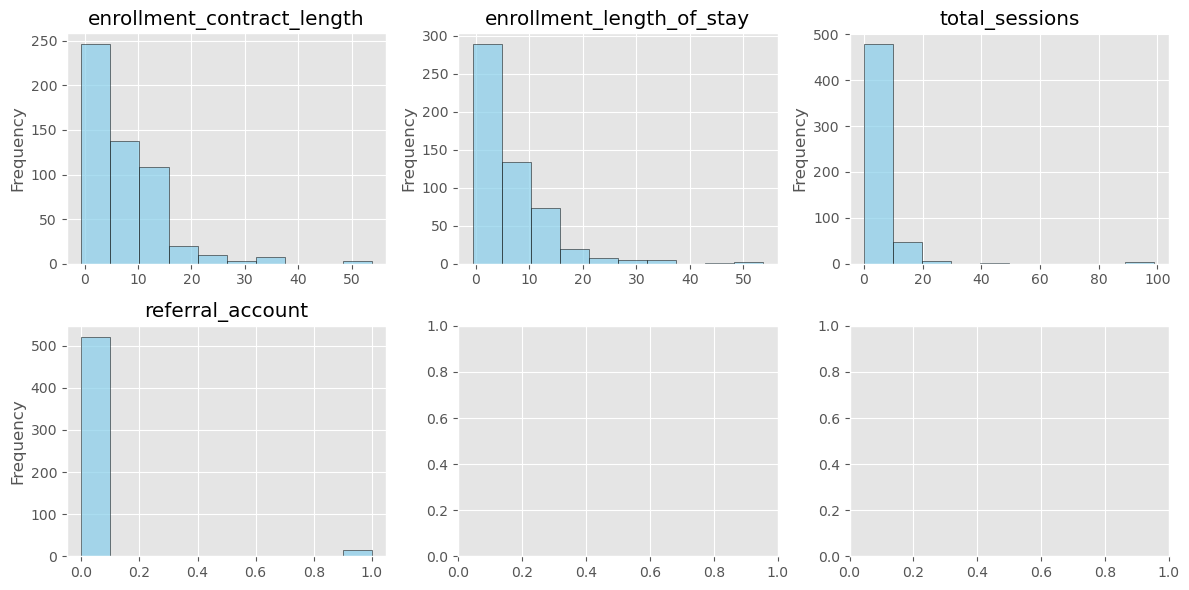

In [502]:
plot_numeric(accounts)

Here we see:
* Most contracts are less than one year.
* Most enrollments are less than one year.
* Total sessions primarily less than 10.
* Hardly any accounts referred.

#### Data Summary

There are 551 accounts from July 2011 - Dec. 2024 measured on 10 features. These include:
* grade - Current grade
* status - Enrolled or inactive
* membership_type - Type of enrollment
* primary_enrollment_start - Enrollment start date
* primary_enrollment_end - Enrollment end date
* enrollment_contract_length - Contract length at signup.
* enrollment_length_of_stay - Length of attendance.
* total_sessions - Allowable sessions based on enrollment type, NOT total attended.
* referral_account - Flag if the account was referred by another cusomter (yes = 1, no = 0)

### Analysis

#### Enrollments Over Time

In [503]:
# Group enrollments by month
monthly_accounts = accounts['membership_type'].resample('M').count()    # Use membership_type because it has no nulls
monthly_accounts.index = pd.to_datetime(monthly_accounts.index)
monthly_accounts

primary_enrollment_start
2011-07-31     1
2011-08-31     0
2011-09-30     0
2011-10-31     1
2011-11-30     0
              ..
2024-08-31    10
2024-09-30     6
2024-10-31    19
2024-11-30     4
2024-12-31     4
Freq: M, Name: membership_type, Length: 162, dtype: int64

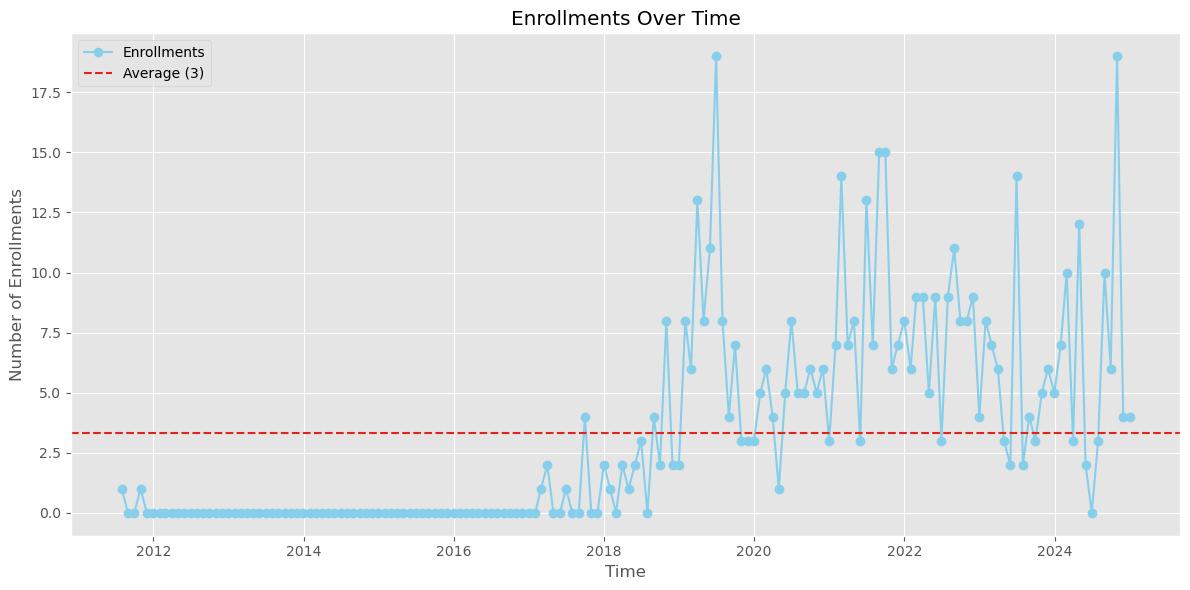

In [504]:
plot_x_over_time(
    x=monthly_accounts.index,
    y=monthly_accounts.values,
    title='Enrollments Over Time',
    y_label='Number of Enrollments',
    line_label='Enrollments'
)

Here we see the same issue as before. I'll filter the dataset in the same way.

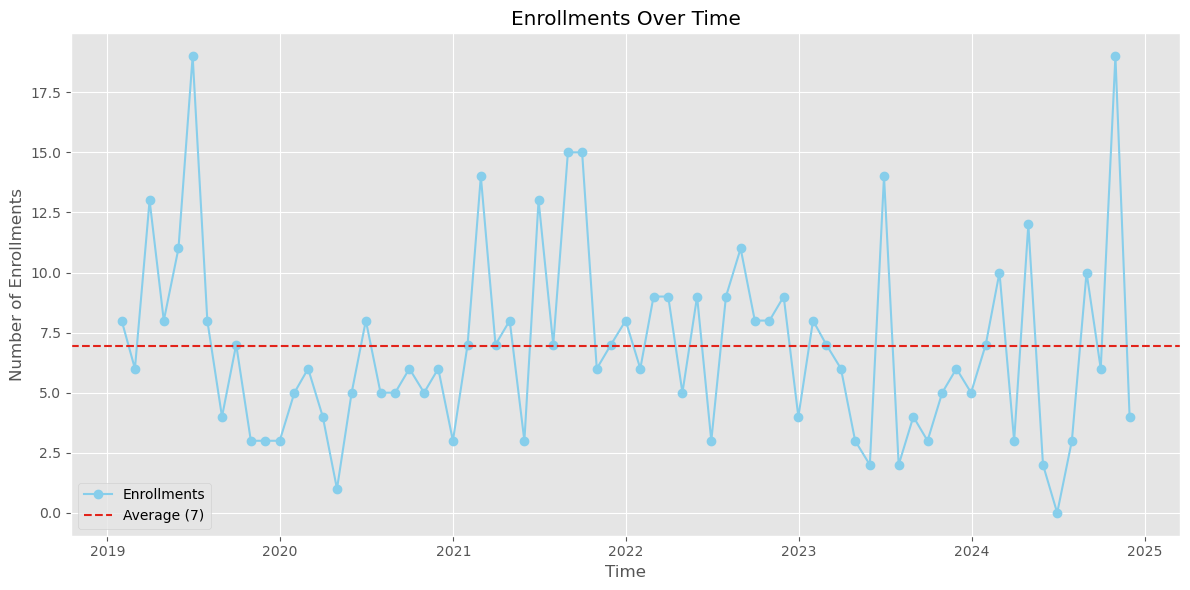

In [505]:
# Filter date >= 2019-01-01 and group by month
filtered_monthly_accounts_start = monthly_accounts[(monthly_accounts.index >= '2019-01-01') & (monthly_accounts.index < '2024-12-01')]

plot_x_over_time(
    x=filtered_monthly_accounts_start.index,
    y=filtered_monthly_accounts_start.values,
    title='Enrollments Over Time',
    y_label='Number of Enrollments',
    line_label='Enrollments'
)

Here we see that the monthly enrollment average is 7.

`Note`: This data includes students that re-enroll and siblings recorded under the same lead account so direct comparison to lead chart above will not match overall Lead Conversion.

#### Enrollments per Month

In [506]:
# Create a 'month' column and set equal to 3 letter abbreviation
filtered_monthly_accounts_start = filtered_monthly_accounts_start.to_frame()
filtered_monthly_accounts_start['month'] = filtered_monthly_accounts_start.index.month_name().str[:3]
filtered_monthly_accounts_start.rename(columns={'membership_type': 'enrollments'}, inplace=True)

# Group by month and calculate the mean for each
enrollment_mean = filtered_monthly_accounts_start.groupby('month').mean()
enrollment_mean

,enrollments
month,
Apr,6.166667
Aug,8.166667
Dec,4.600000
Feb,8.666667
Jan,6.833333
Jul,5.666667
Jun,9.500000
Mar,7.000000
May,5.333333


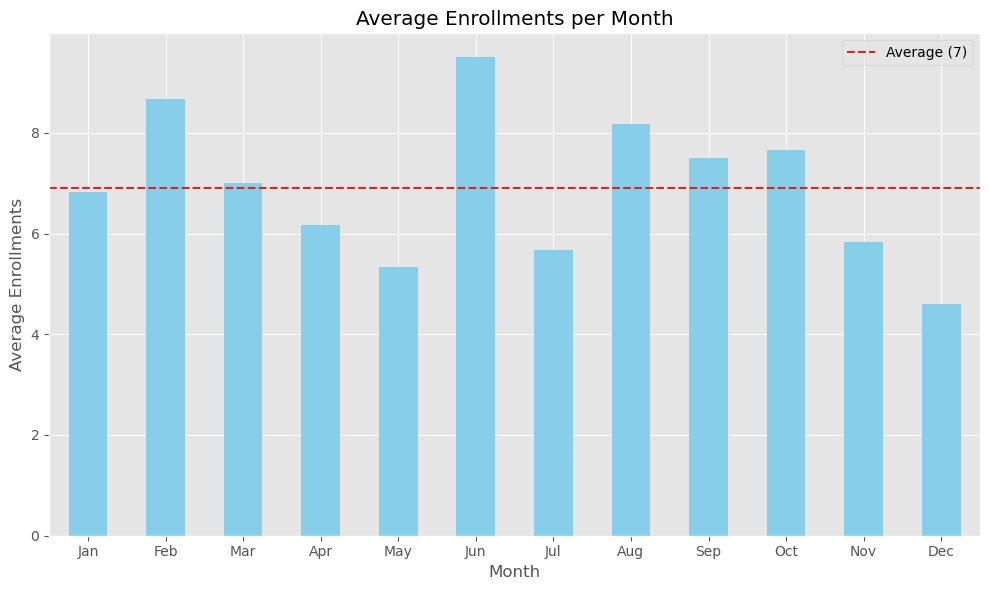

In [507]:
plot_x_per_month(
    y=enrollment_mean['enrollments'],
    title='Average Enrollments per Month',
    y_label='Average Enrollments'
)

Here we see enrollments are:
* Lowest in May (month of finals)
* Highest in June (summer prep)

#### Enrollments by Membership Type

In [508]:
# Check counts of membership types
accounts['membership_type'].value_counts()

membership_type
Flexible                                               319
Monthly Sessions                                       119
Private Sessions Package                                43
Summer 2024 (Private Sessions Package)                  14
Summer Program (Private Sessions Package)                8
Monthly Sessions (4x) (Monthly Sessions)                 7
Summer 2023 (Private Sessions Package)                   5
Military and First Responders 6X (Monthly Sessions)      4
Sessions Package                                         3
Summer Promotion (Sessions Package)                      3
Paid in full (Monthly Sessions)                          3
Credits (Flexible)                                       2
Summer Session Packages (Sessions Package)               1
Base 10 (Monthly Sessions)                               1
Paid In Full  (Monthly Sessions)                         1
Winter Sessions Package (Private Sessions Package)       1
Veronica Alvarez WP21 (Private Sessions 

In [509]:
# Create map to consolidate membership types
def map_program_type(program_type):
    if 'Flexible' in program_type:
        return 'Flexible'
    elif 'Monthly' in program_type:
        return 'Monthly Sessions'
    elif 'Private' in program_type:
        return 'Private Sessions'
    elif 'Sessions' in program_type:
        return 'Session Packages'
    else:
        return 'Other'

In [510]:
# Apply mapping to membership_type
accounts['membership_type'] = accounts['membership_type'].apply(map_program_type)
membership_type_counts = accounts['membership_type'].value_counts()
membership_type_counts

membership_type
Flexible            321
Monthly Sessions    136
Private Sessions     72
Session Packages      7
Name: count, dtype: int64

In [511]:
# Percentage of recurring enrollment types
percent_recurring_enrollments = (membership_type_counts['Flexible'] + membership_type_counts['Monthly Sessions']) / membership_type_counts.sum() * 100
print(f'The percentage of enrollments that choose a recurring program is: {percent_recurring_enrollments:.0f}%')

The percentage of enrollments that choose a recurring program is: 85%


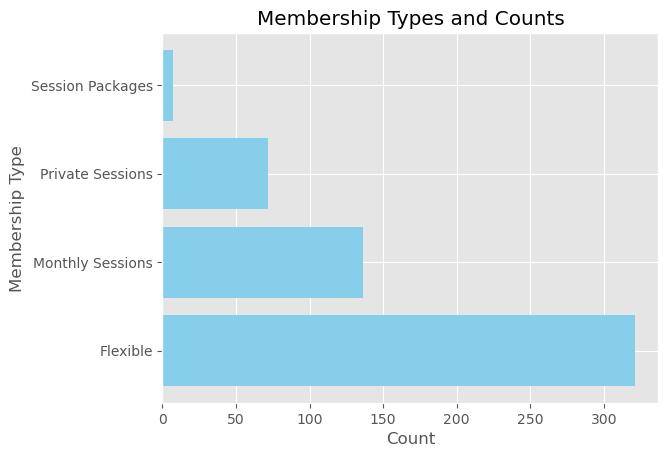

In [512]:
# Data to plot
x = accounts['membership_type'].value_counts().index
y = accounts['membership_type'].value_counts().values

# Plot
plt.barh(x, y, color='skyblue')

# Add title and labels
plt.title('Membership Types and Counts');
plt.xlabel('Count')
plt.ylabel('Membership Type')
plt.show();

Here we see that the dominant enrollment type is the 'Flexible' option.

In [513]:
# Isolate memberships by subtype ('total_sessions' allowed)
monthly_membership_subtypes = accounts.copy()
monthly_sessions = monthly_membership_subtypes['membership_type'] == 'Monthly Sessions'
monthly_membership_subtypes.loc[monthly_sessions, 'membership_type'] = monthly_membership_subtypes.loc[monthly_sessions, 'total_sessions'].astype(str) + 'x'

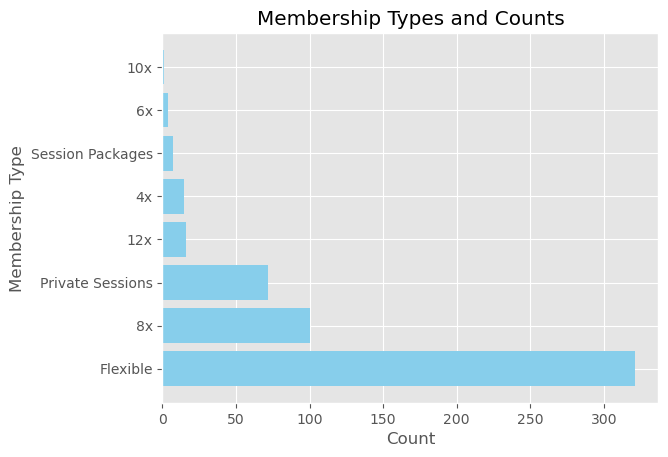

In [514]:
# Data to plot
x = monthly_membership_subtypes['membership_type'].value_counts().index
y = monthly_membership_subtypes['membership_type'].value_counts().values

# Plot
plt.barh(x, y, color='skyblue')

# Add title and labels
plt.title('Membership Types and Counts');
plt.xlabel('Count')
plt.ylabel('Membership Type')
plt.show();

Here we see that of the monthly membership options, the 8x program subtype is most common.

#### Enrollments by Grade Range

In [515]:
# Copy Accounts df and isolate those where Grade is not NaN or 13
account_student_grades = accounts.copy()
account_student_grades = account_student_grades.loc[(account_student_grades['grade'] != 13) & (account_student_grades['grade'].notna())]

# Calculate elapsed time
account_student_grades['elapsed_years'] = (pd.to_datetime('now') - account_student_grades.index)

# Convert to years
account_student_grades['elapsed_years'] = round(account_student_grades['elapsed_years'].dt.total_seconds() / (60 * 60 * 24 * 365.25), 0)
account_student_grades.head()

account_student_grades['grade'] = account_student_grades['grade'].astype(int)
account_student_grades['grade_when_created'] = account_student_grades['grade'] - account_student_grades['elapsed_years']
account_student_grades.head()

,grade,status,membership_type,primary_enrollment_end,enrollment_contract_length,enrollment_length_of_stay,total_sessions,referral_account,elapsed_years,grade_when_created
primary_enrollment_start,,,,,,,,,,
2017-02-07,11,Inactive,Flexible,2017-03-25,1.5,1.5,0,0,8.0,3.0
2017-03-13,12,Inactive,Flexible,2017-09-30,6.6,6.6,0,0,8.0,4.0
2017-06-15,10,Inactive,Session Packages,2017-08-31,2.5,2.5,17,0,8.0,2.0
2017-09-01,10,Inactive,Flexible,2020-05-02,32.0,27.0,0,0,7.0,3.0
2017-09-04,11,Inactive,Flexible,2021-10-11,49.2,47.2,0,0,7.0,4.0


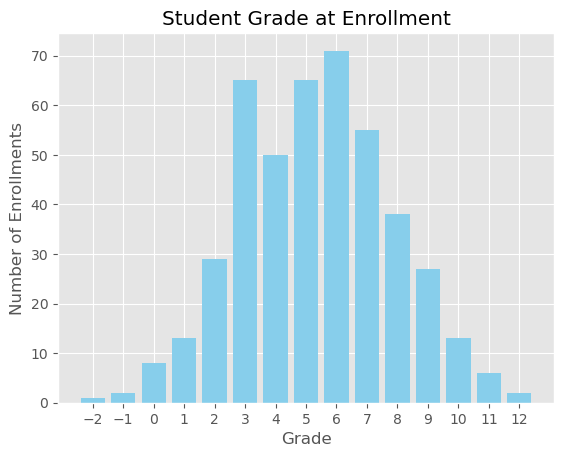

In [516]:
# Data to plot
x = account_student_grades['grade_when_created'].value_counts().index
y = account_student_grades['grade_when_created'].value_counts().values

# Plot
plt.bar(x, y, color='skyblue')

# Add title and labels
plt.title('Student Grade at Enrollment')
plt.xlabel('Grade')
plt.xticks(range(int(x.min()), int(x.max()) + 1))
plt.ylabel('Number of Enrollments')
plt.show();

Here we see that:
* Inquiries start coming in 2 years prior to kindergarten (0).
* Student enrollment is highest for 6th graders.
* Data closely mirrors a normal distribution.

In [517]:
# Create new column for grade range
account_student_grades['grade_range'] = account_student_grades['grade_when_created'].apply(assign_grade_range)

In [518]:
account_student_grades.head()

,grade,status,membership_type,primary_enrollment_end,enrollment_contract_length,enrollment_length_of_stay,total_sessions,referral_account,elapsed_years,grade_when_created,grade_range
primary_enrollment_start,,,,,,,,,,,
2017-02-07,11,Inactive,Flexible,2017-03-25,1.5,1.5,0,0,8.0,3.0,Elementary
2017-03-13,12,Inactive,Flexible,2017-09-30,6.6,6.6,0,0,8.0,4.0,Elementary
2017-06-15,10,Inactive,Session Packages,2017-08-31,2.5,2.5,17,0,8.0,2.0,Elementary
2017-09-01,10,Inactive,Flexible,2020-05-02,32.0,27.0,0,0,7.0,3.0,Elementary
2017-09-04,11,Inactive,Flexible,2021-10-11,49.2,47.2,0,0,7.0,4.0,Elementary


In [519]:
account_student_grades['grade_range'].value_counts()

grade_range
Elementary    233
Middle        164
High           48
Name: count, dtype: int64

In [520]:
# Group by grade_range and membership_type
membership_by_grade_range = account_student_grades.groupby(['grade_range', 'membership_type']).size()
membership_by_grade_range

grade_range  membership_type 
Elementary   Flexible            156
             Monthly Sessions     54
             Private Sessions     18
             Session Packages      5
High         Flexible             21
             Monthly Sessions     18
             Private Sessions      9
Middle       Flexible            103
             Monthly Sessions     51
             Private Sessions      9
             Session Packages      1
dtype: int64

In [521]:
# Create pivot table
membership_pivot = membership_by_grade_range.unstack(fill_value=0)
membership_percent = membership_pivot.div(membership_pivot.sum(axis=1), axis=0)  # Row-wise normalization

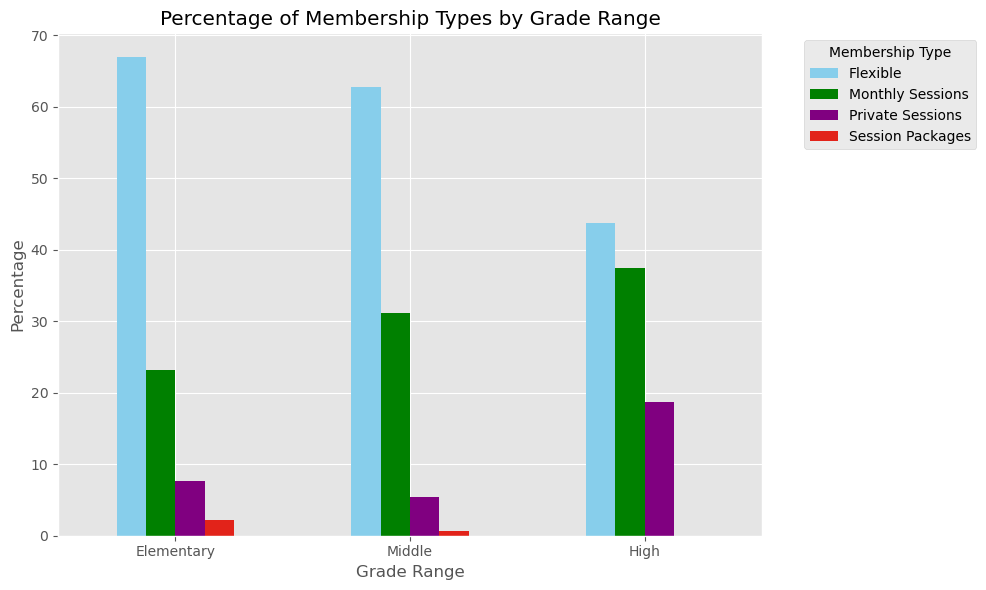

In [522]:
# Specify display order
grade_order = ['Elementary', 'Middle', 'High']
membership_percent.index = pd.CategoricalIndex(membership_percent.index, categories=grade_order, ordered=True)
membership_percent = membership_percent.sort_index() * 100

# Plot side-by-side percentage bars
membership_percent.plot(
    figsize=(10, 6),
    kind='bar',
    stacked=False,
    color=['skyblue', 'green', 'purple', '#E2231A', 'orange']
)

# Add title and labels
plt.title('Percentage of Membership Types by Grade Range')
plt.xlabel('Grade Range')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.legend(title='Membership Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show();

Here we see:
* Elementary school students predominantly enroll in the flexible membership option.
* Middle school students still enroll in the flexible option most often but with monthly sessions a closer second option.
* High school students enroll in near-equal numbers for the flexible and monthly options with a large jump in private session enrollments.

#### Cancellations Over Time

Enrollment End Dates by Month

In [523]:
# Copy accounts df and set primary_enrollment_end as the index
accounts_end = accounts.copy()
accounts_end.set_index('primary_enrollment_end', inplace=True)

# Filter date >= 2019-01-01 and group by month
filtered_accounts_end = accounts_end[(accounts_end.index >= '2019-01-01') & (accounts_end.index < '2024-12-01')]
filtered_monthly_accounts_end = filtered_accounts_end['membership_type'].resample('M').count()    # Use membership_type because it has no nulls
filtered_monthly_accounts_end.index = pd.to_datetime(filtered_monthly_accounts_end.index)
filtered_monthly_accounts_end.head()

primary_enrollment_end
2019-01-31    4
2019-02-28    3
2019-03-31    6
2019-04-30    9
2019-05-31    7
Freq: M, Name: membership_type, dtype: int64

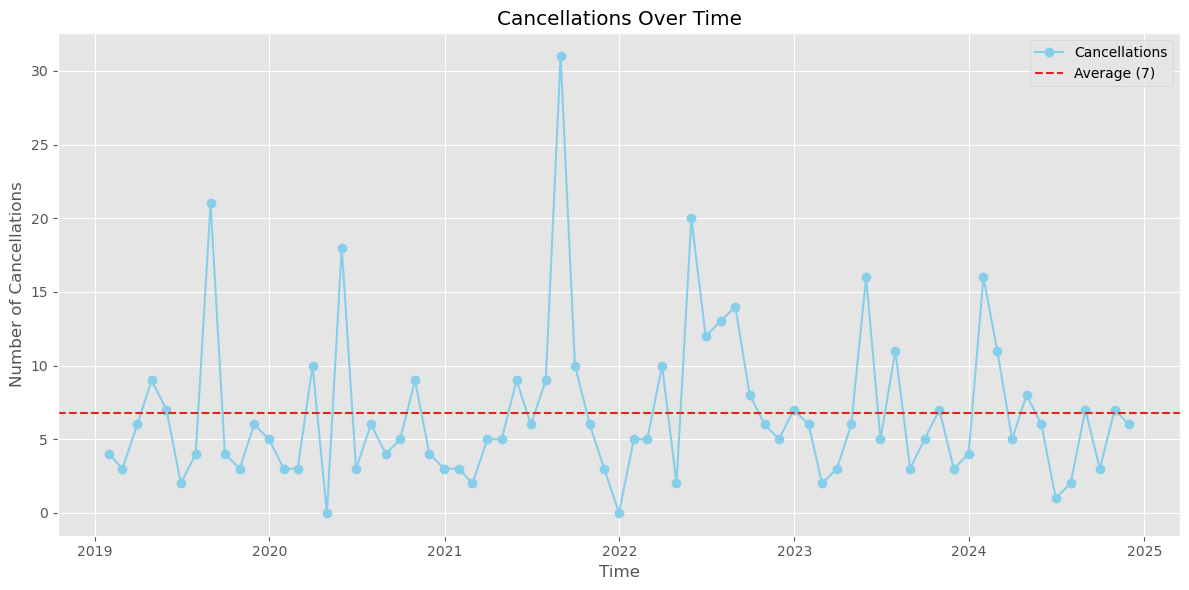

In [524]:
plot_x_over_time(
    x=filtered_monthly_accounts_end.index,
    y=filtered_monthly_accounts_end.values,
    title='Cancellations Over Time',
    y_label='Number of Cancellations',
    line_label='Cancellations'
)

Here we see that average monthly cancellations is 7.

#### Cancellations per Month

In [525]:
# Create a 'month' column and set equal to 3 letter abbreviation
filtered_monthly_accounts_end = filtered_monthly_accounts_end.to_frame()
filtered_monthly_accounts_end['month'] = filtered_monthly_accounts_end.index.month_name().str[:3]
filtered_monthly_accounts_end.rename(columns={'membership_type': 'cancellations'}, inplace=True)

# Group by month and calculate the mean for each
cancellation_mean = filtered_monthly_accounts_end.groupby('month').mean()
cancellation_mean

,cancellations
month,
Apr,5.000000
Aug,13.333333
Dec,3.800000
Feb,4.333333
Jan,6.166667
Jul,7.500000
Jun,4.833333
Mar,6.500000
May,12.666667


It's a little peculiar that August is so high given that it is the start of the school year. Let's check for outliers.

In [526]:
# August has severl high cancellation years so we'll leave it as is
filtered_monthly_accounts_end.loc[filtered_monthly_accounts_end['month'] == 'Aug']

,cancellations,month
primary_enrollment_end,,
2019-08-31,21,Aug
2020-08-31,4,Aug
2021-08-31,31,Aug
2022-08-31,14,Aug
2023-08-31,3,Aug
2024-08-31,7,Aug


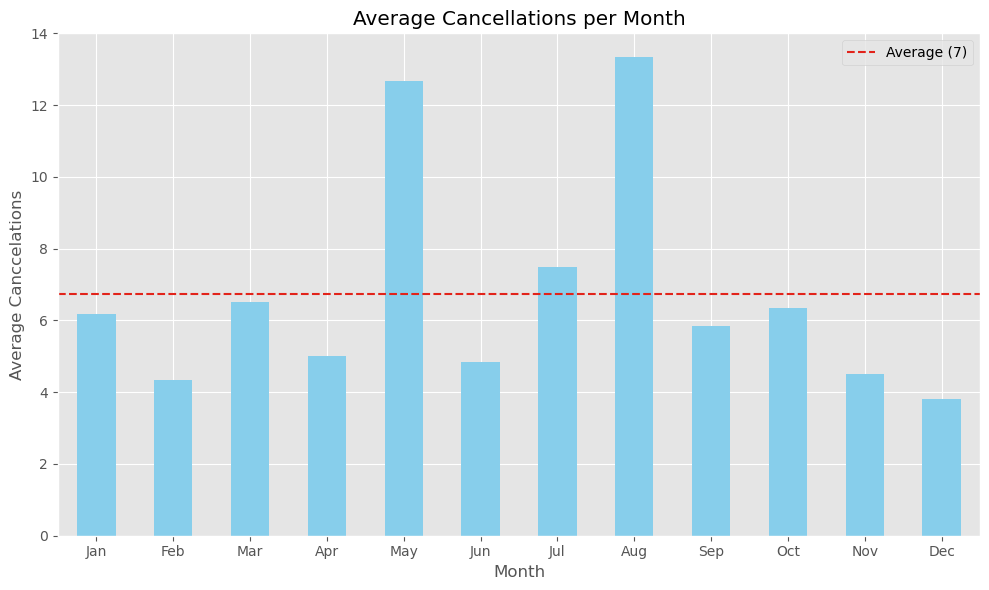

In [527]:
plot_x_per_month(
    y=cancellation_mean['cancellations'],
    title='Average Cancellations per Month',
    y_label='Average Canccelations'
)

Here we see that cancellations are:
* Lowest in December (end of first semester).
* Highest in August (start of new school year; "we'll see how this year goes").

#### Net Monthly Change in Enrollments

In [528]:
# Check structure
enrollment_mean

,enrollments
month,
Apr,6.166667
Aug,8.166667
Dec,4.600000
Feb,8.666667
Jan,6.833333
Jul,5.666667
Jun,9.500000
Mar,7.000000
May,5.333333


In [529]:
# Check structure
cancellation_mean

,cancellations
month,
Apr,5.000000
Aug,13.333333
Dec,3.800000
Feb,4.333333
Jan,6.166667
Jul,7.500000
Jun,4.833333
Mar,6.500000
May,12.666667


In [530]:
# Calculate net monthly change in enrollments
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

net_monthly_change = enrollment_mean['enrollments'].reindex(month_order) - cancellation_mean['cancellations'].reindex(month_order)
net_monthly_change

month
Jan    0.666667
Feb    4.333333
Mar    0.500000
Apr    1.166667
May   -7.333333
Jun    4.666667
Jul   -1.833333
Aug   -5.166667
Sep    1.666667
Oct    1.333333
Nov    1.333333
Dec    0.800000
dtype: float64

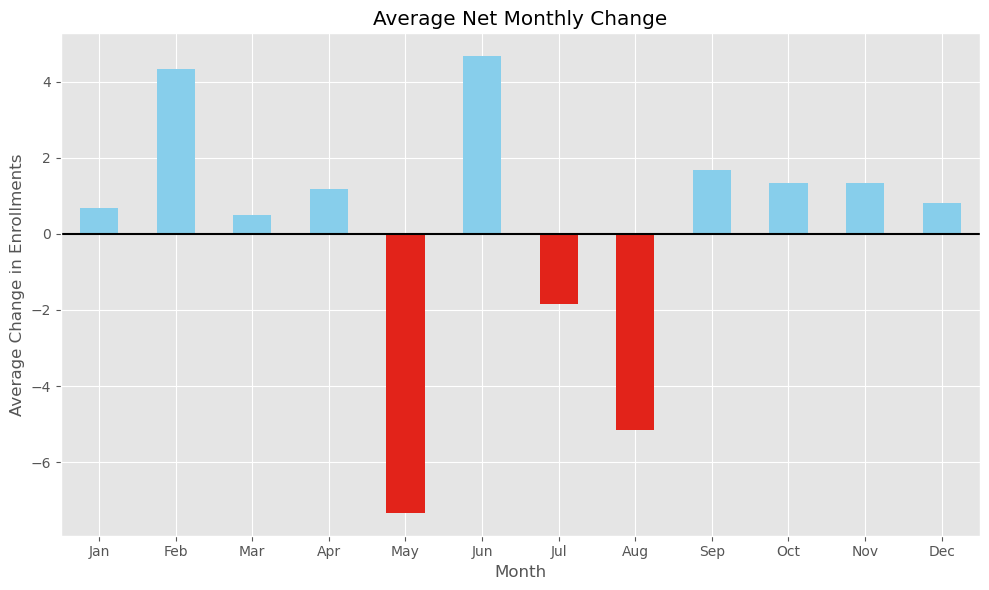

In [531]:
# Plot
plt.figure(figsize=(10, 6))
colors = ['#E2231A' if value < 0 else 'skyblue' for value in net_monthly_change]
net_monthly_change.plot(kind='bar', color=colors, legend=False)
plt.axhline(0, color='black')  # Add a reference line at 0

# Add title and labels
plt.title('Average Net Monthly Change')
plt.xlabel('Month')
plt.ylabel('Average Change in Enrollments')
plt.xticks(rotation=0)
plt.tight_layout();

In [532]:
net_monthly_change.sum()

2.133333333333332

Here we see that:
* There are 3 months of the year that have net negative enrollment (more cancellations than enrollments) with May being the worst month.
* There are 9 months of the year that have net positive enrollment (more enrollments than cancellations) with June being the best month.
* Average Net Change per Year is +2 students.

#### Enrollment Completion

In [533]:
# Percentage of families that cancel before they complete their agreement
early_cancel = accounts.loc[accounts['enrollment_length_of_stay'] < accounts['enrollment_contract_length']]
early_cancel_percentage = len(early_cancel) / len(accounts) * 100
print(f'The percentage of families that complete their entire enrollment agreement is {100 - early_cancel_percentage:.0f}%')
print(f'The percentage of families that cancel their program before the end of their agreement is: {early_cancel_percentage:.0f}%')

The percentage of families that complete their entire enrollment agreement is 78%
The percentage of families that cancel their program before the end of their agreement is: 22%


In [534]:
mean_length_of_stay = accounts['enrollment_length_of_stay'].mean()
print(f'On average students stay enrolled for {mean_length_of_stay:.1f} months per enrollment agreeement.')

On average students stay enrolled for 6.4 months per enrollment agreeement.


In [535]:
accounts['enrollment_length_of_stay'].loc[accounts['enrollment_length_of_stay'] < 0]

primary_enrollment_start
2021-06-01   -0.6
2023-11-01   -0.1
Name: enrollment_length_of_stay, dtype: float64

In [536]:
plot_histogram

<function __main__.plot_histogram(data, title, x_label, mean_median='median', x_ticks_interval=1, bins=None)>

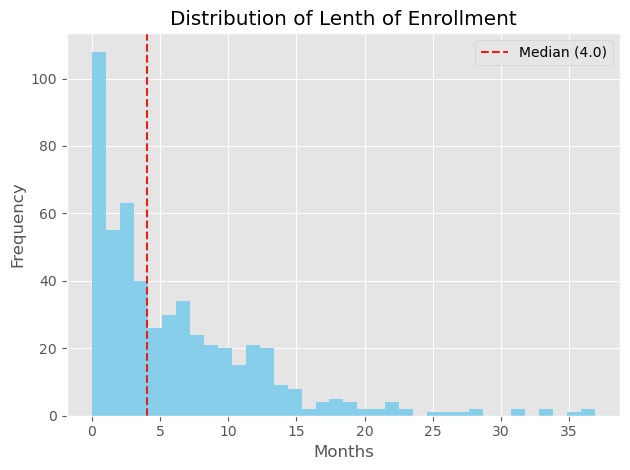

In [537]:
# Visualize
# Filtered less than 40 to exclude outliers and enhance visual
plot_histogram(
    data=accounts['enrollment_length_of_stay'].loc[(accounts['enrollment_length_of_stay'] >= 0) & (accounts['enrollment_length_of_stay'] < 40)],
    title='Distribution of Lenth of Enrollment',
    x_label='Months',
    x_ticks_interval=5
)

Here we see that length of enrollment is skewed right. Median length of enrollment is 4.0 months.

### Recommendations

* Re-engage ‘inactive’ accounts for re-enrollment.
* Create a referral program to simultaneously increase revenue and reputation.
* Tailor program offering to grade range.
* Upsell current customers by offering private sessions at key times of the year.
* Increase retention through active communication and progress reporting, especially leading into the end of the school year.
* Incentivize longer commitments to increase average length of stay.

___
## Student Progress per Assessment Level

### Data

Assessment data comes from a single source. I anonymized the data to maintain confidentiality and protect proprietary details.

In [538]:
# Inspect contents
assessment_progress = pd.read_csv(assessment_progress_location)
assessment_progress = standardize_columns(assessment_progress)
assessment_progress.head()

,grade_on_post_dt.,assessment_level,#_post_attempts,pre_assess_score,pre_assess_date,post_assess_score,post_assess_date,#_pks_mastered,score_improvement,improvement/session,improvement/month,attendance_count_in_center
0,6,8,3,0.72289,1/19/2023,1.00000,3/12/2023,38,0.27711,0.006759,0.159469,39
1,6,7,3,0.60396,11/2/2022,0.94059,1/2/2023,32,0.33663,0.007481,0.165600,44
2,6,7,2,0.77777,1/2/2023,1.00000,1/19/2023,15,0.22223,0.015874,0.376556,12
3,7,9,3,0.28358,3/13/2023,0.71641,9/3/2023,46,0.43283,0.006659,0.075436,63
4,7,9,2,0.12500,10/2/2023,0.91666,2/26/2024,12,0.79166,0.009314,0.163146,83


In [539]:
# Set index to pre-assessment date and sort by date
assessment_progress['pre_assess_date'] = pd.to_datetime(assessment_progress['pre_assess_date'])
assessment_progress.sort_values(by='pre_assess_date', ascending=True, inplace=True)
assessment_progress.set_index('pre_assess_date', inplace=True)

In [540]:
assessment_progress.shape

(403, 11)

In [541]:
# Check data types
assessment_progress.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 403 entries, 2011-08-17 to 2024-10-23
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   grade_on_post_dt.           401 non-null    object 
 1   assessment_level            403 non-null    object 
 2   #_post_attempts             403 non-null    int64  
 3   pre_assess_score            364 non-null    float64
 4   post_assess_score           364 non-null    float64
 5   post_assess_date            403 non-null    object 
 6   #_pks_mastered              403 non-null    int64  
 7   score_improvement           364 non-null    float64
 8   improvement/session         364 non-null    float64
 9   improvement/month           364 non-null    float64
 10  attendance_count_in_center  403 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 37.8+ KB


In [542]:
# Check for nulls
assessment_progress.isna().sum()

grade_on_post_dt.              2
assessment_level               0
#_post_attempts                0
pre_assess_score              39
post_assess_score             39
post_assess_date               0
#_pks_mastered                 0
score_improvement             39
improvement/session           39
improvement/month             39
attendance_count_in_center     0
dtype: int64

In [543]:
# Get stats for numeric columns
assessment_progress.describe()

,#_post_attempts,pre_assess_score,post_assess_score,#_pks_mastered,score_improvement,improvement/session,improvement/month,attendance_count_in_center
count,403.000000,364.000000,364.000000,403.000000,364.000000,364.000000,364.000000,403.000000
mean,1.600496,0.470102,0.786320,14.786600,0.316218,0.008718,0.054361,42.084367
std,1.127097,0.201873,0.218652,11.769516,0.200824,0.028938,0.833146,43.018310
min,1.000000,0.000000,0.086410,0.000000,-0.510200,-0.510200,-15.561100,0.000000
25%,1.000000,0.323925,0.647333,6.000000,0.184347,0.004955,0.037025,15.500000
50%,1.000000,0.456140,0.842850,12.000000,0.292130,0.007647,0.061174,30.000000
75%,2.000000,0.602790,1.000000,21.000000,0.456143,0.013121,0.110257,55.000000
max,14.000000,1.000000,1.000000,77.000000,0.865670,0.080953,1.851808,330.000000


#### Data Cleaning & Feature Engineering

* grade_on_post_dt. - Convert to int.
* assessment_level - Can be used to calculate disparity between grade and perforance. Convert to int.
* post_assess_date - Convert to datetime.

In [544]:
# Use grade_map to replace 'K' and 'College'
assessment_progress['grade_on_post_dt.'] = assessment_progress['grade_on_post_dt.'].replace(grade_map)

# Make post_assess_date datetime
assessment_progress['post_assess_date'] = pd.to_datetime(assessment_progress['post_assess_date'])

In [545]:
# See all assessments with Null grade_on_post_dt. to look for patterns
assessment_progress.loc[assessment_progress['grade_on_post_dt.'].isna() == True]

,grade_on_post_dt.,assessment_level,#_post_attempts,pre_assess_score,post_assess_score,post_assess_date,#_pks_mastered,score_improvement,improvement/session,improvement/month,attendance_count_in_center
pre_assess_date,,,,,,,,,,,
2011-08-17,NaN,5,2,0.3051,0.7966,2011-10-25,0,0.4915,0.000000,0.214154,0
2017-03-09,NaN,8,3,0.3012,1.0000,2017-08-11,47,0.6988,0.011092,0.136624,0


In [546]:
# Find the median post grade for each assessment level
median_post_grade_per_assessment_level = assessment_progress.groupby(['assessment_level'])['grade_on_post_dt.'].median()

# Fill nulls with asessment-level median grade
assessment_progress['grade_on_post_dt.'] = assessment_progress['grade_on_post_dt.'].fillna(
    assessment_progress['assessment_level'].map(median_post_grade_per_assessment_level)
)

In [547]:
# NF type assessment gets assigned a mastery level, not a numeric score. 
# Because structure and depth of learning plan differ from other types of assessments I'll drop these.
assessment_progress.loc[assessment_progress['pre_assess_score'].isna() == True]

,grade_on_post_dt.,assessment_level,#_post_attempts,pre_assess_score,post_assess_score,post_assess_date,#_pks_mastered,score_improvement,improvement/session,improvement/month,attendance_count_in_center
pre_assess_date,,,,,,,,,,,
2018-11-03,1,NF,1,NaN,NaN,2019-01-12,9,NaN,NaN,NaN,0
2019-02-10,0,NF,2,NaN,NaN,2019-05-30,14,NaN,NaN,NaN,46
2019-03-12,0,NF,1,NaN,NaN,2019-05-23,10,NaN,NaN,NaN,43
2019-05-30,2,NF,1,NaN,NaN,2019-07-09,10,NaN,NaN,NaN,15
2019-05-30,2,NF,1,NaN,NaN,2019-07-09,10,NaN,NaN,NaN,15
2019-11-04,8,MFF,1,NaN,NaN,2020-01-06,36,NaN,NaN,NaN,38
2019-11-20,0,NF,1,NaN,NaN,2019-12-11,8,NaN,NaN,NaN,7
2019-11-25,1,NF,1,NaN,NaN,2020-03-11,21,NaN,NaN,NaN,30
2022-08-04,5,NF,2,NaN,NaN,2023-10-17,16,NaN,NaN,NaN,102


In [548]:
# Calculate percent of assessments that are NF
percentage_nf_assessments = len(assessment_progress.loc[assessment_progress['pre_assess_score'].isna() == True]) / len(assessment_progress) * 100
print(f'{percentage_nf_assessments:.0f}% of all assessments are NF.')

10% of all assessments are NF.


In [549]:
# Drop NF-type assessments
assessment_progress = assessment_progress.dropna()

In [550]:
# Convert grade_on_post_dt. and assessment_level to numeric columns
assessment_progress['grade_on_post_dt.'] = pd.to_numeric(assessment_progress['grade_on_post_dt.'])
assessment_progress['assessment_level'] = pd.to_numeric(assessment_progress['assessment_level'])

In [551]:
# Calculate performance relative to grade level
assessment_progress['relative_performance'] = assessment_progress['assessment_level'] - assessment_progress['grade_on_post_dt.']

#### Data Visualization

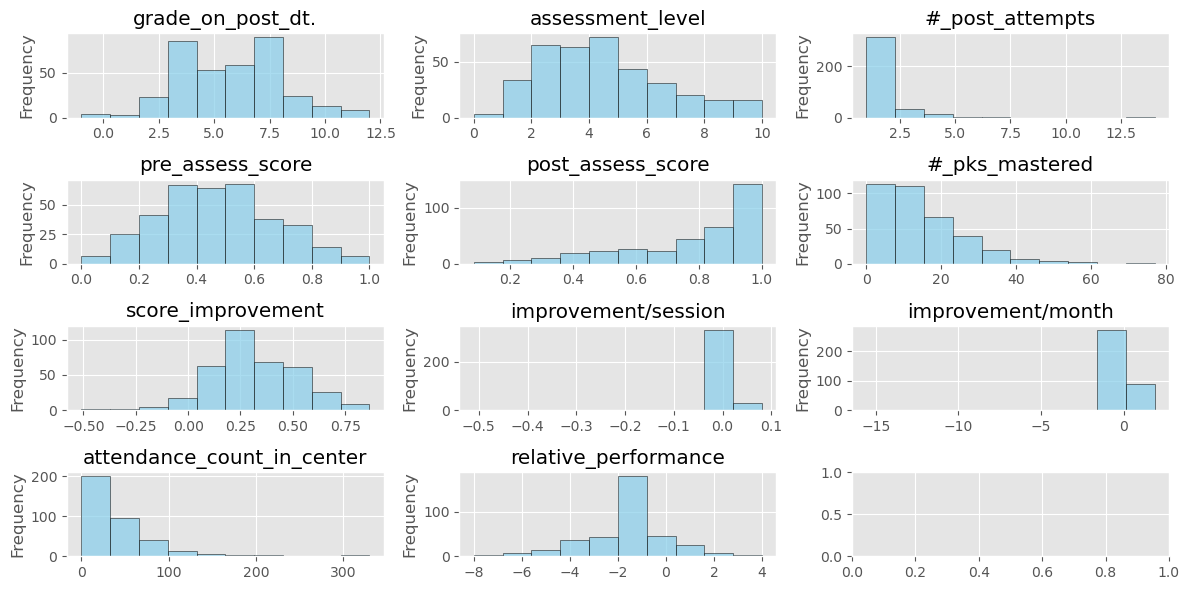

In [552]:
plot_numeric(assessment_progress)

Here we see that:
* Grade at time of post assessment peaks around 4th grade.
* Levels 3-5 are the most common assessment types.
* Most students take the post-assessment 1-2 times.
* Pre assessment scores are typically in the range of 30-60%.
* Post assessment scores have a strong downward skew (higher scores increasingly more frequent).
* Number of PKs mastered per level is primarily less than 30.
* Score improvement is around 25-35%.
* Improvement per session is concentrated in a small range.
* Improvemnet per month is concentrated in a small range.
* Attendance has strong positive skew.
* Relative performance is mostly 2 years under grade level.

#### Data Summary

Assessment data includes all assessments for students where at least one post assessment has been attempted. There are 403 assessments matching this criteria from 2000-01-01 to 2024-12-09. Each assessment is measured across 12 features:
* grade_on_post_dt. - Grade of student at time of post assessment.
* assessment_level - Grade level equivalent of student performance. NF assessments (10% of total) were dropped.
* #_post_attempts - Number of attempts on post-assessment (>= 80 moves to next assessment level).
* pre_assess_score - Range between 0-100% with mean and median near 45%.
* post_assess_score - Range between 8-100% with mean and median near 80%.
* post_assess_date - Date of post-assessment.
* #_pks_mastered - Lessons mastered between pre and post dates. Mean is 15, median is 12.
* score_improvement - Change in score from pre-assessment to post-assessment.
* improvement/session - Improvement divided by attendance for assessment level. 
* improvement/month - Improvement divided by time between pre and post assessment. Roughly +5-6% per month.
* attendance_count_in_center - Number of sessions in assessment period. Strong positive skew with mean at 42 and median at 30.
* relative_performance - Comparison of student assessment level to grade level. A negative value indicates they are below grade level.

### Analysis

#### Performance per Post-Assessment Attempt

In [553]:
# Loop calculates average change in assessment score based on number of attempts

# Initialize
cumulative_performance = 0
performance_per_attempt = []

for attempt in range(1, assessment_progress['#_post_attempts'].max() + 1):

    # Calculate current iteration performance and take away effects of previous iterations
    current_performance = assessment_progress.loc[assessment_progress['#_post_attempts'] == attempt]['score_improvement'].mean() - cumulative_performance
    print(f"Average performance after {attempt} attempt(s) is: {(current_performance) * 100:.1f}%")

    # Add to cumulative performance for deduction in later iterations
    cumulative_performance += current_performance
    performance_per_attempt.append((attempt, current_performance * 100))

Average performance after 1 attempt(s) is: 27.4%
Average performance after 2 attempt(s) is: 7.9%
Average performance after 3 attempt(s) is: 7.9%
Average performance after 4 attempt(s) is: 8.7%
Average performance after 5 attempt(s) is: -31.7%
Average performance after 6 attempt(s) is: 39.6%
Average performance after 7 attempt(s) is: -17.0%
Average performance after 8 attempt(s) is: nan%
Average performance after 9 attempt(s) is: nan%
Average performance after 10 attempt(s) is: nan%
Average performance after 11 attempt(s) is: nan%
Average performance after 12 attempt(s) is: nan%
Average performance after 13 attempt(s) is: nan%
Average performance after 14 attempt(s) is: nan%


In [554]:
performance_per_attempt

[(1, 27.364606986899563),
 (2, 7.9496636013357325),
 (3, 7.860573161764705),
 (4, 8.672739583333334),
 (5, -31.707583333333332),
 (6, 39.571999999999996),
 (7, -17.014999999999997),
 (8, nan),
 (9, nan),
 (10, nan),
 (11, nan),
 (12, nan),
 (13, nan),
 (14, nan)]

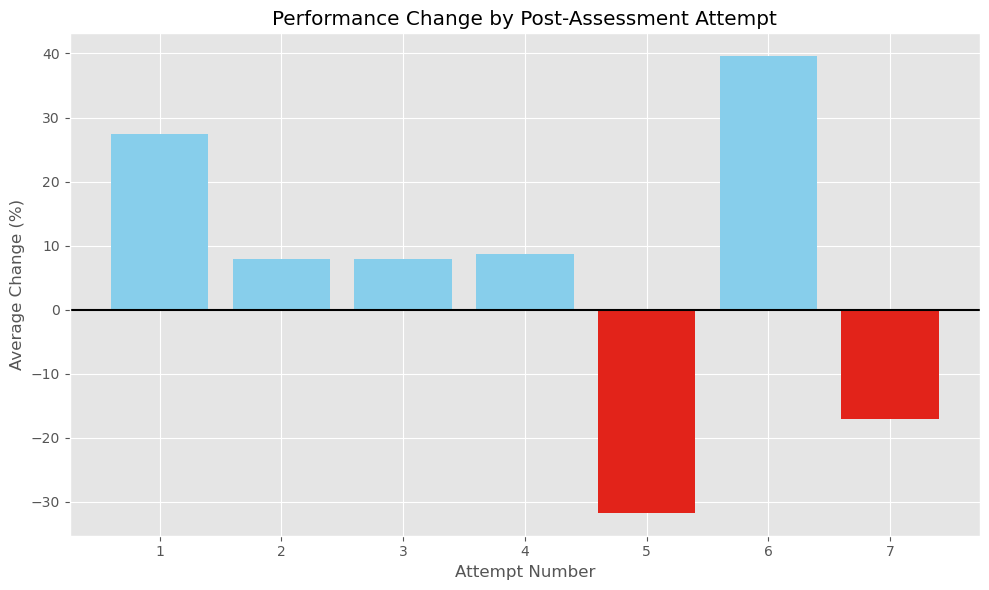

In [555]:
# Data to plot
performance_df = pd.DataFrame(performance_per_attempt, columns=['attempt', 'performance'])
x = performance_df['attempt']
y = performance_df['performance']

colors = ['#E2231A' if value < 0 else 'skyblue' for value in performance_df['performance']]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color=colors)
plt.axhline(0, color='black')  # Add a reference line at 0

# Add title and labels
plt.title('Performance Change by Post-Assessment Attempt')
plt.xlabel('Attempt Number')
plt.ylabel('Average Change (%)')
plt.tight_layout()
plt.show();

Here we see a strong initial increase in scoring from pre-assessment to post-assessment followed by moderate growth on subsequent attempts before highly volatile movements starting at the 5th attempt. The decreases in performance for attempts 5 and 7 may be caused by several factors:
* There is less content to master as score rises.
* The remaining content is especially challenging for the student.
* The student may feel burntout after several iterations of the same content.

#### Student Advancement

Generally, students are promoted to the next level when they get at least 80% on their post assessment. Let's take a closer look at the trends that allow a student to move from one level to the next.

In [556]:
# Isolate rows where post_assess_score >= 80%
next_level_assessments = assessment_progress.loc[assessment_progress['post_assess_score'] >= 0.8]
next_level_assessments.shape

(222, 12)

In [557]:
# Calculate elapsed time in months
next_level_assessments['elapsed_months'] = round((next_level_assessments['post_assess_date'] - next_level_assessments.index).dt.days / 30.44, 1)
next_level_assessments.head()

C:\Users\Elija\AppData\Local\Temp\ipykernel_12668\3762714973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_level_assessments['elapsed_months'] = round((next_level_assessments['post_assess_date'] - next_level_assessments.index).dt.days / 30.44, 1)


,grade_on_post_dt.,assessment_level,#_post_attempts,pre_assess_score,post_assess_score,post_assess_date,#_pks_mastered,score_improvement,improvement/session,improvement/month,attendance_count_in_center,relative_performance,elapsed_months
pre_assess_date,,,,,,,,,,,,,
2017-03-09,9.0,8,3,0.30120,1.00000,2017-08-11,47,0.69880,0.011092,0.136624,0,-1.0,5.1
2017-09-14,4.0,2,1,0.71930,0.96491,2017-12-07,24,0.24561,0.006298,0.088131,0,-2.0,2.8
2017-10-25,3.0,3,1,0.54290,1.00000,2018-03-11,19,0.45710,0.006177,0.101026,0,0.0,4.5
2017-12-12,4.0,3,1,0.72857,0.87142,2018-05-03,21,0.14285,0.002421,0.030468,0,-1.0,4.7
2017-12-20,4.0,2,1,0.67982,1.00000,2018-09-09,25,0.32018,0.004926,0.036990,0,-2.0,8.6


In [558]:
next_level_assessments.describe()

,grade_on_post_dt.,assessment_level,#_post_attempts,pre_assess_score,post_assess_score,post_assess_date,#_pks_mastered,score_improvement,improvement/session,improvement/month,attendance_count_in_center,relative_performance,elapsed_months
count,222.000000,222.000000,222.000000,222.000000,222.000000,222,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,5.333333,3.801802,1.657658,0.542550,0.933155,2021-08-03 07:08:06.486486528,17.671171,0.390605,0.011630,0.121181,41.954955,-1.531532,6.144144
min,-1.000000,0.000000,1.000000,0.017540,0.800000,2017-08-11 00:00:00,0.000000,-0.012350,-0.001372,-0.001674,0.000000,-8.000000,0.100000
25%,4.000000,2.000000,1.000000,0.403748,0.864190,2019-08-28 06:00:00,9.000000,0.243548,0.006161,0.048608,14.000000,-2.000000,2.525000
50%,5.000000,3.000000,1.000000,0.542875,0.951205,2021-04-19 12:00:00,16.000000,0.400000,0.008621,0.076104,30.500000,-1.000000,4.650000
75%,7.000000,5.000000,2.000000,0.681312,1.000000,2023-05-22 12:00:00,25.000000,0.508130,0.014446,0.149557,60.750000,-1.000000,7.850000
max,11.000000,10.000000,7.000000,1.000000,1.000000,2024-11-23 00:00:00,77.000000,0.865670,0.080953,1.851808,227.000000,4.000000,60.500000
std,2.179017,2.187252,1.033340,0.189753,0.070341,NaN,11.509389,0.185666,0.009872,0.169202,39.929550,1.742832,6.172420


* Average attempts is 1.7 to move from one level to the next.
* Students who complete a given level average 93% on their post-assessment.
* It takes roughly 16-18 PKs to reach mastery from initial assessment score near 55%.
* It takes roughly 31 (median) to 42 (mean) visits to progress from one level to the next.
* It takes roughly 4.7 (median) to 6.1 (mean) months to progress from one level to the next.

##### Post Assessment Attempts

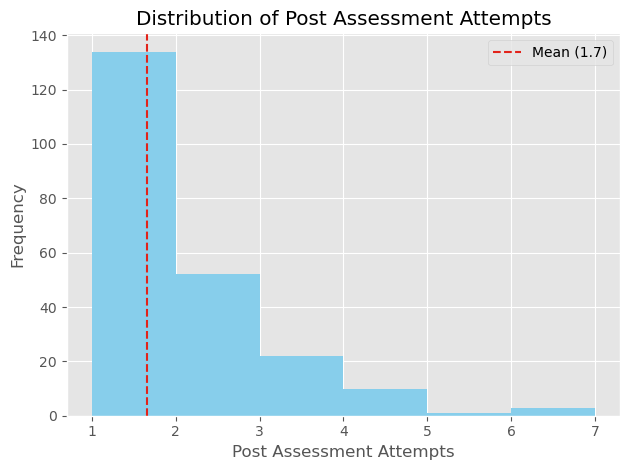

In [559]:
# Visualize
plot_histogram(
    data=next_level_assessments['#_post_attempts'],
    title='Distribution of Post Assessment Attempts',
    x_label='Post Assessment Attempts',
    mean_median='mean'
)

Here we see that most students move to the next level within 2 attempts.

##### PKs per Level

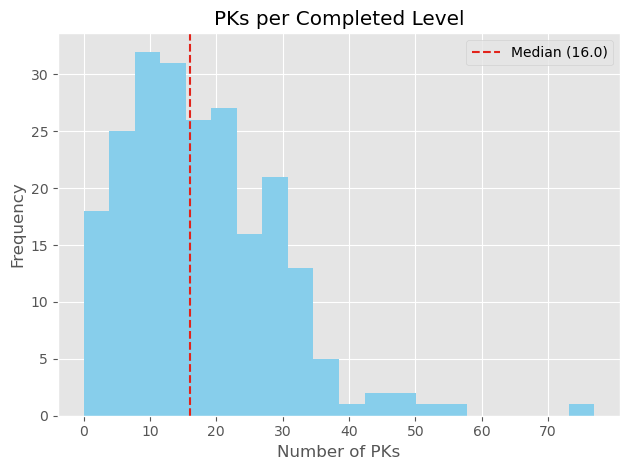

In [560]:
# Visualize
plot_histogram(
    data=next_level_assessments['#_pks_mastered'],
    title='PKs per Completed Level',
    x_label='Number of PKs',
    bins=20,
    x_ticks_interval=10
)

Here we see that there is a strong positive skew for PKs required to complete each level. The median is 16.0.

##### Visits per Level

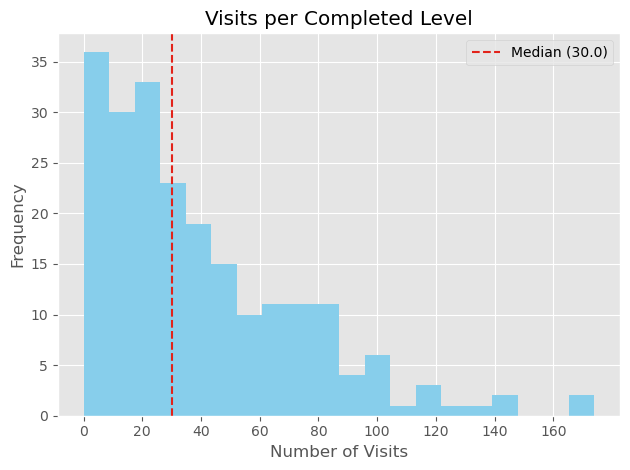

In [561]:
# Visualize
# Filtered less than 180 to exclude outliers and enhance visual
plot_histogram(
    data=next_level_assessments['attendance_count_in_center'].loc[next_level_assessments['attendance_count_in_center'] < 180],
    title='Visits per Completed Level',
    x_label='Number of Visits',
    bins=20,
    x_ticks_interval=20
)

Here we see that the number of visits has an extremely large range with strong positive skew. The median number of visits for a student to move to the next level is 30.

##### Time per Level

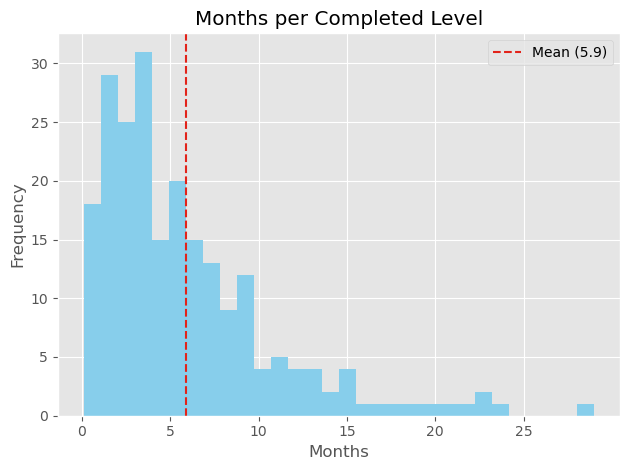

In [562]:
# Visualize
# Filtered less than 40 to exclude outliers and enhance visual
plot_histogram(
    data=next_level_assessments['elapsed_months'].loc[next_level_assessments['elapsed_months'] < 40],
    title='Months per Completed Level',
    x_label='Months',
    bins=30,
    x_ticks_interval=5,
    mean_median='mean'
)

Here we see that:
* There is a strong positive skew.
* Most students move to the next level within the first year.
* The median time is 4.6 months.

`Note`: The discrepancy between number of visits required (and therefore time) to complete a level is influenced by factors such as:
* Score on pre-assessment
* The portion of the sessions dedicated to PKs vs school work
* Consistent student attendance

#### Relative Student Performance

In [563]:
# Median test-taker relative_performance
median_relative_performance = next_level_assessments['relative_performance'].median()
print(f'Students who have completed a pre-assessment and post-assessment for the same level are approximately {median_relative_performance:.1f} grades from grade level.')

Students who have completed a pre-assessment and post-assessment for the same level are approximately -1.0 grades from grade level.


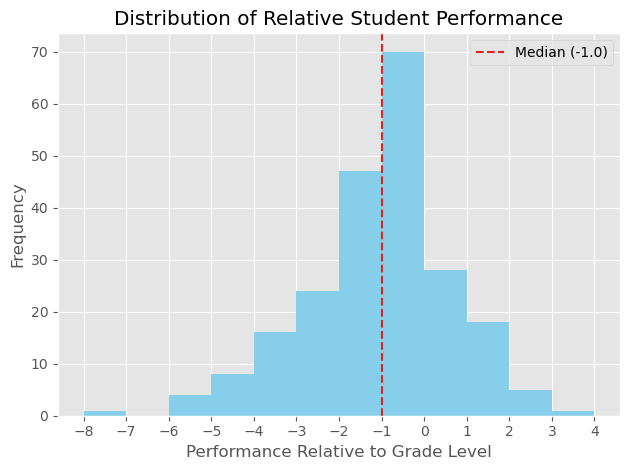

In [564]:
plot_histogram(
    data=next_level_assessments['relative_performance'],
    title='Distribution of Relative Student Performance',
    x_label='Performance Relative to Grade Level'
)

Here we see that relative student performance:
* Ranges from 8 years below grade level to 4 years above grade level.
* Median 1.0 year below grade level.

`NOTE`: This includes data for students that have completed multiple levels and excludes students that have yet to take a post assessment. Therefore students entering the program are likely below the median.

### Recommendations

* Highlight ability to work with students of all ability levels
* Flag students that are failing to achieve a passing score after their second post-assessment to understand reasons why.
    * Target higher pre-assessment scores so students are more likely to pass post-assessment within two attempts.
* Monitor PK completion, checking for true mastery along the way.
* Use time-based metrics to set expectations upon enrollment and to communicate progress toward long term objectives over the course of their enrollment.
    * Visits per Level: 30-40
    * Time per Level: 4.6-6 months

___
## Results

### Leads

* Lead Volume
    * Cyclical pattern with 1-2 large peaks above average per year, except during COVID where it remained at depressed levels.
    * New monthly leads average 18.
    * New leads are highest in March (end of the third quarter).
    * New leads are lowest during June & July (summer).

* Leads Converted
    * Cyclical pattern.
    * Average monthly leads converted is 4.
    * Lead conversion is highest in May and at the start of the school year (Aug. & Sept.).
    * Lead conversion is lowest in June & July (summer).

* Percent Lead Conversion
    * Cyclical pattern with 2022 marking the start of below-average performance.
    * Average monthly conversion is 34%.
    * Highest conversion rate is in June (families more serious about getting summer help).
    * Lowest conversion is in March (opportunity zone!).

* Other Info
    * Leads are most common for elementary-aged students, specifically grades 3-6.
    * Leads who enroll in the program are most commonly from zip codes 2, 1, and 3.

### Accounts

* Average monthly enrollment is 7, indicating high success with re-enrollments of same students and/or sibling enrollments.
* The dominant enrollment type is the Flexible option. Broken down by grade range we see:
    * Elementary: 67% enrolled in Flexible option with 22% enrolled in Monthly Sessions.
    * Middle: 62/31 split
    * High: 43/37 with a large increase in demand for private sessions (18)
* Student grade at enrollment is highest for grades 3, 5, and 6.
* Average monthly cancellations is 7.
    * Highest months are May and Aug. Last and first month of school respectively. Possibly explained by families wanting to "see how this year goes" before committing to a longer term option. (opportunity zone!)
    * Lowest month is Dec. (semester 1 finals).
* Net change in enrollments is positive most months of the year with strong detractors in May and Aug.
    * Average Net change per year is +2.
* Enrollment length is 4.0 (median) to 6.2 (mean) months.

### Student Progress per Assessment Level

* Relative student performance is 1.5 (mean) to 1.0 (median) BELOW grade level.
* Students progress most upon first post-assessment attempt at 27%.
    * Subsequent attempts plateaued near 8% improvement before becoming very volatile at the 5th attempt..
* Most students pass to the next level within 1-2 attempts.
* Per level metrics:
    * PKs completed is approximately 16.
    * Attendance is 30 sessions.
    * Time is 4.6 (median) to 5.9 (mean) months.


___
## Conclusions

This analysis leads to the following recommendations:

### Leads

* Re-engage with ‘open’ leads to push them further in the pipeline.
* Demonstrate long term value to unconverted leads, incentivizing them to come in for assessments if necessary.
* With lead interest highest  at the end of the third quarter, focus on enrollment conversion during that time.
    * Best opportunity is in March since it consistently has the most leads but also the lowest conversion rate.
* With lead interest lowest over the summer:
    * Focus marketing efforts to capture additional lead interest.
    * Focus on retention strategies for enrolled families.
* Ensure marketing strategy is tailored to target demographic:
    * Parents of late-elementary and early-middle school students (grades 3-6).
    * Residents in zip codes 2, 1, and 3.

### Accounts

* Re-engage ‘inactive’ accounts for re-enrollment.
* Create a referral program to simultaneously increase revenue and reputation.
* Tailor program offering to grade range.
* Upsell current customers (especially high schoolers) by offering private sessions at key times of the year.
* Increase retention through active communication and progress reporting, especially leading up to May and August.
* Incentivize longer commitments to increase average length of stay.

### Student Progress per Assessment Level

* Highlight capability to work with students of all ability levels to build trust and credibility with new leads. 
* Flag students that are failing to achieve a passing score after their second post-assessment to understand reasons why.
    * Target higher pre-assessment scores so students are more likely to pass post-assessment within two attempts.
* Monitor PK completion, checking for true mastery along the way.
* Use time-based metrics to set expectations for interested families and to advise best program to match their objectives to their child's current perforamnce level. These should also be used to communicate progress toward long-term objectives over the course of their enrollment.
    * Visits per Level: 30-40
    * Time per Level: 4.6-5.9 months

___
## Next Steps

* Use long term and monthly understanding of lead volume and lead conversion/enrollment data to:
    * Make informed decisions about promotional offerings:
        * Incentives for new families to get started.
        * Discounts for continuous enrollment beyond average.
    * Provide appropriate staff training at critical times of the year:
        * Sales training leading up to March.
        * Retention training leading toward the summer.
    * Create structured and realistic expectations of management staff performance.
        * Enhance staff motivation by offering bonuses for exceptional conversion rates.
* Use demographic information to:
    * Create unique marketing campaigns based on location.
    * Tailor marketing efforts to parents of late-elementary and early-middle school students.
* Use student assesssment/enrollment information to:
    * Make program recommendations based on student profile.
    * Strategize on approaches to extend student enrollment.
    * Monitor enrolled students' progress and:
        * Intervene when they are not meeting goals.
        * Communicate with parents about current standing and confirm/reset expectations for the future.

___
## Opportunities for Improvement

* Clean duplicate leads and accounts on the backend so future reports are cleaner and more accurate.
* Collect lead information (zip code, student grade, etc.) consistently to allow more insights into customer demographic. This will enhance targeted marketing efforts.
    * If possible, record grade of student upon initial interest, at start of each enrollment, and over time to maintain an accurate representation of students' grades at each step in the pipeline.
* Ensure all private sessions are recorded as enrollments and not simply billed to the account.
* Always do a post-assessment (progress check) to correctly capture and measure Assessment Progress rather than moving a student to the next level.